### Regression : Car Price Prediciton

* problem statement

> There is one chinese car company want to enter into US market, where they will establish their plant is US and will give tough comptition for US car companies and europeon car counterparts

> in order to understand what factors matters the car price in american market since those may be different from chinese market

* Company want to know:

> which variable are significant in predicting price of car
    
>How well those variable describe the price of car

### Business goal
* You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# step 1: reading and understanding the data
# importing the data using pandas library
# understanding the structure of the data

In [4]:
cars_df=pd.read_csv("CarPrice_Assignment.csv")

In [5]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Step 1 : Data preprocessing

In [6]:
cars_df.drop('car_ID',axis=1,inplace=True)

In [7]:
cars_df.shape

(205, 25)

In [8]:
cars_df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [9]:
cars_df.rename(columns = {'curbweight':'carweight'}, inplace = True)

In [10]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  carweight         205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [11]:
# there are no missing values

In [12]:
cars_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,carweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
cars_df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [14]:
# splitting company name from car name

In [15]:
CompanyName=cars_df["CarName"].apply(lambda x: x.split(" ")[0])
cars_df.insert(3,'CompanyName',CompanyName)

In [16]:
cars_df.drop('CarName',axis=1,inplace=True)

In [17]:
cars_df.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
cars_df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [19]:
cars_df.CompanyName=cars_df.CompanyName.str.lower()

def replace(a,b):
    cars_df.CompanyName.replace(a,b,inplace=True)
    
replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [20]:
cars_df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [21]:
#checking for the duplicates
duplicates=cars_df[cars_df.duplicated()]

In [22]:
duplicates

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [23]:
# there is no duplicate values

In [24]:
cars_df.columns

Index(['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'carweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

## Step 2: EDA - Visualization of the data

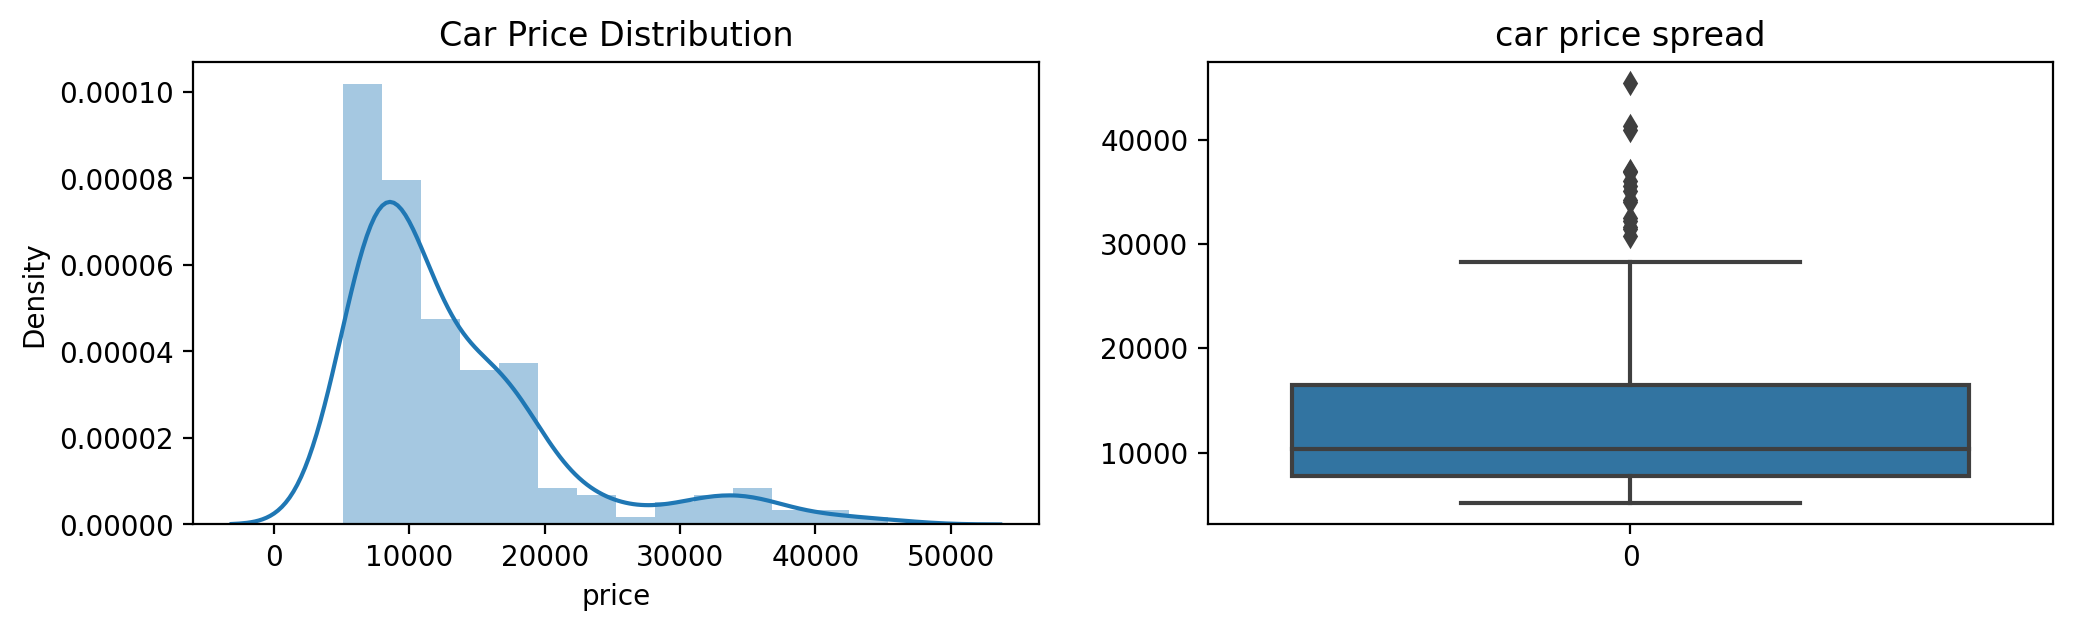

In [25]:
plt.figure(figsize=(12,3),dpi=200)

plt.subplot(1,2,1)
sns.distplot(cars_df.price)
plt.title("Car Price Distribution")

plt.subplot(1,2,2)
sns.boxplot(cars_df.price)
plt.title('car price spread')

plt.show()

In [26]:
#plot 1: plot is right skewed, most of the car has low price in dataset....maximum number of car have price in range between 5000 to 20000
# there is significant difference between mean and median
# the data points are far out spread from mean which indicates high variance in the car price 85% car price is below 18500 and rest 15% are from 18500 to 45400
#plot 2: there are certain car whose value are extreme high

In [27]:
cars_df['price'].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

In [28]:
# visulizing categorical data

df.info()

* categorical data

1.CompanyName
2.enginetype
3.fuel system
4.cylindernumber 
5.fueltype  
6.enginelocation 
7.drivewheel
8.doornumber
9.aspiration 
10.carbody
11.symbolling

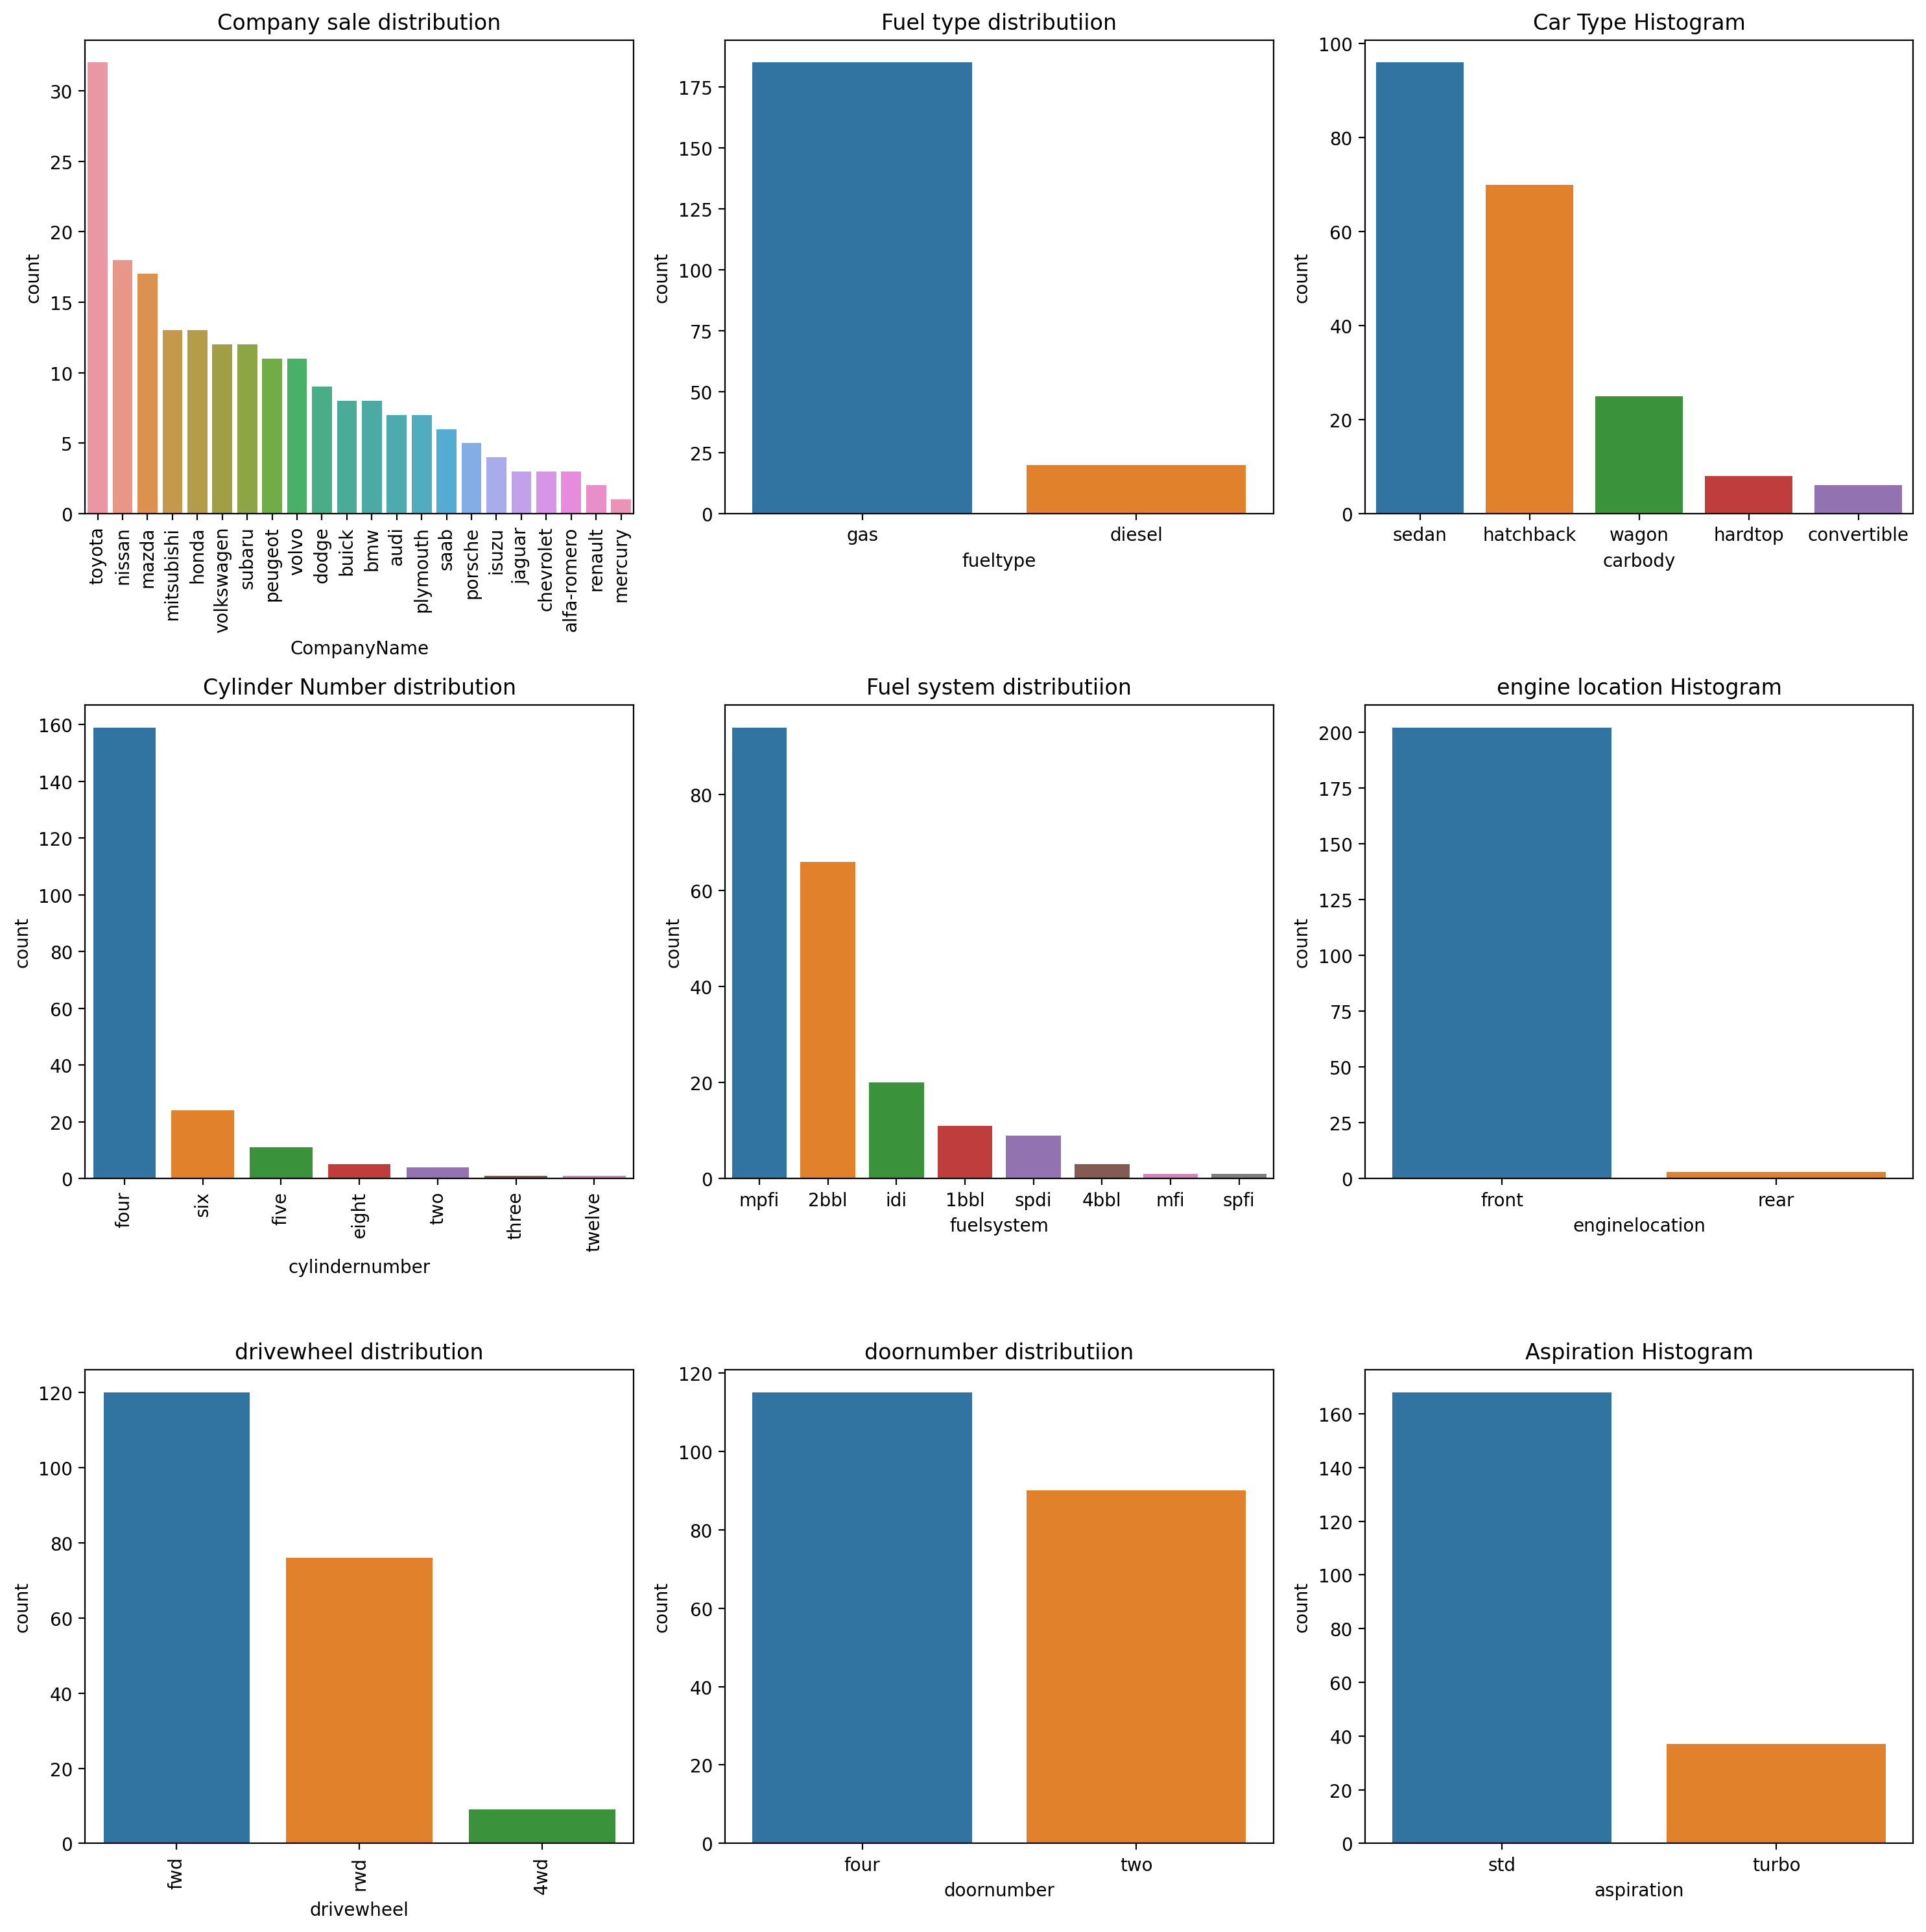

In [29]:
plt.figure(figsize=(15,15),dpi=200)

plt.subplot(3,3,1)
sns.countplot(x=cars_df['CompanyName'],order=cars_df['CompanyName'].value_counts().index)
plt.title('Company sale distribution')
plt.xticks(rotation=90)

plt.subplot(3,3,2)
sns.countplot(x=cars_df['fueltype'])
plt.title('Fuel type distributiion')

plt.subplot(3,3,3)
sns.countplot(x=cars_df['carbody'],order=cars_df['carbody'].value_counts().index)
plt.title('Car Type Histogram')

#==================================================================================================

plt.subplot(3,3,4)
sns.countplot(x=cars_df['cylindernumber'],order=cars_df['cylindernumber'].value_counts().index)
plt.title('Cylinder Number distribution')
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.countplot(x=cars_df['fuelsystem'],order=cars_df['fuelsystem'].value_counts().index)
plt.title('Fuel system distributiion')

plt.subplot(3,3,6)
sns.countplot(x=cars_df['enginelocation'],order=cars_df['enginelocation'].value_counts().index)
plt.title('engine location Histogram')

#===================================================================================================

plt.subplot(3,3,7)
sns.countplot(x=cars_df['drivewheel'],order=cars_df['drivewheel'].value_counts().index)
plt.title('drivewheel distribution')
plt.xticks(rotation=90)

plt.subplot(3,3,8)
sns.countplot(x=cars_df['doornumber'],order=cars_df['doornumber'].value_counts().index)
plt.title('doornumber distributiion')

plt.subplot(3,3,9)
sns.countplot(x=cars_df['aspiration'],order=cars_df['aspiration'].value_counts().index)
plt.title('Aspiration Histogram')

#================================================================================================
plt.tight_layout()

In [30]:
# toyota is most favoured car
# number of gas fueled car is more than diesel
# sedan is the most famous type car
# four cylinder engine is most acceptable
# mpfi and 2bbl is most acceptable fuel system
# front engine location is highly prefered over rear engine location

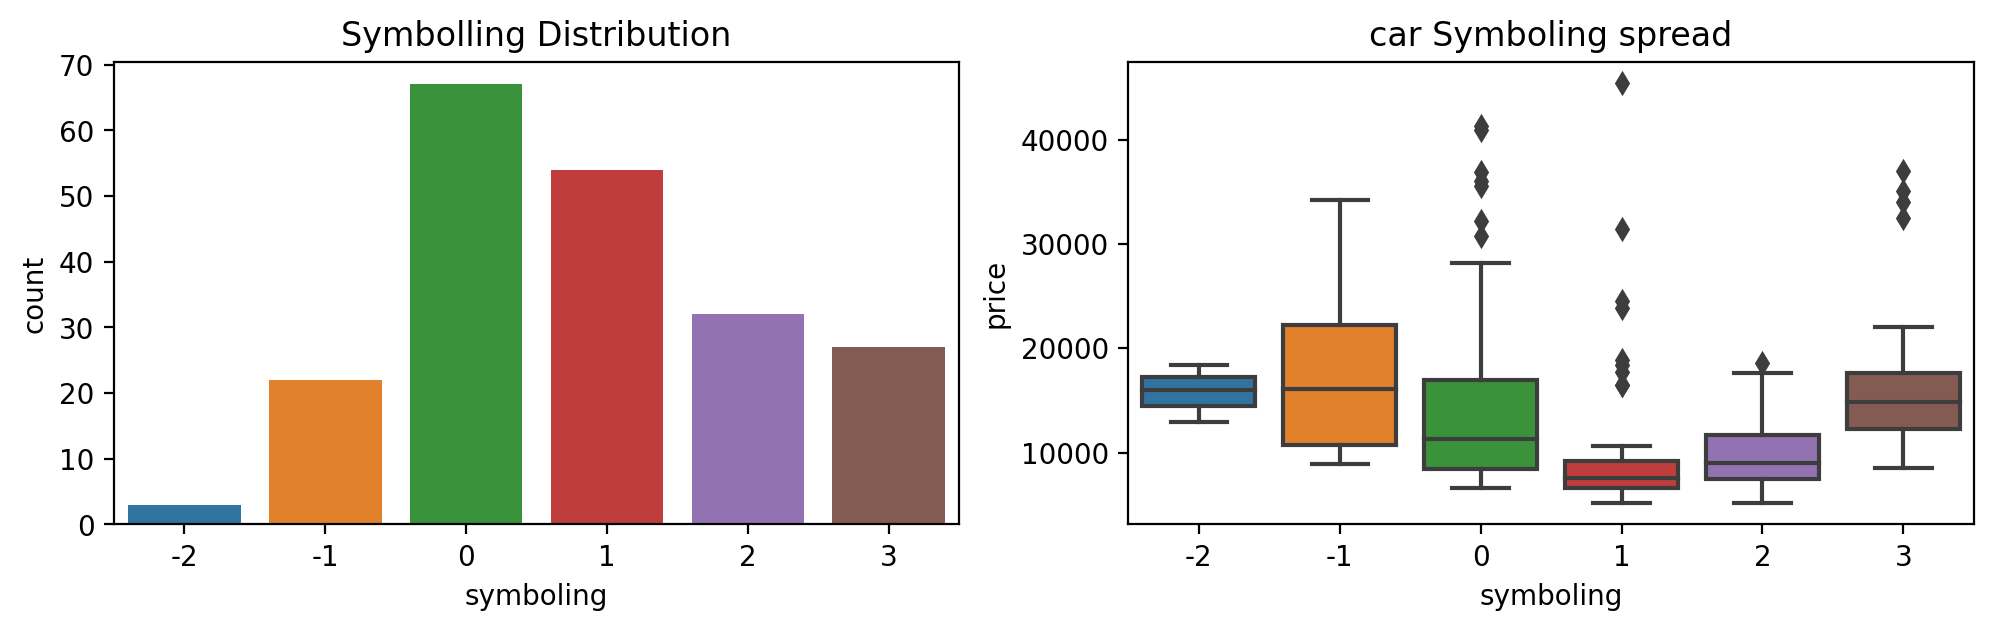

In [31]:
plt.figure(figsize=(12,3),dpi=200)


plt.subplot(1,2,1)
sns.countplot(x=cars_df['symboling'])
plt.title("Symbolling Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=cars_df.symboling,y=cars_df.price)
plt.title('car Symboling spread')

plt.show()

#### inference:
* it seems that symboling 0 and 1 values has high number of rows

* the car with -1 symboling seem to be high priced (as it makes sense too , insurance rating -1 is quite good). but it seem symboling with 3 value has price range similar to -2 value.there is dip in price at symbol 1

### A] Let study Company Name and its relation with price

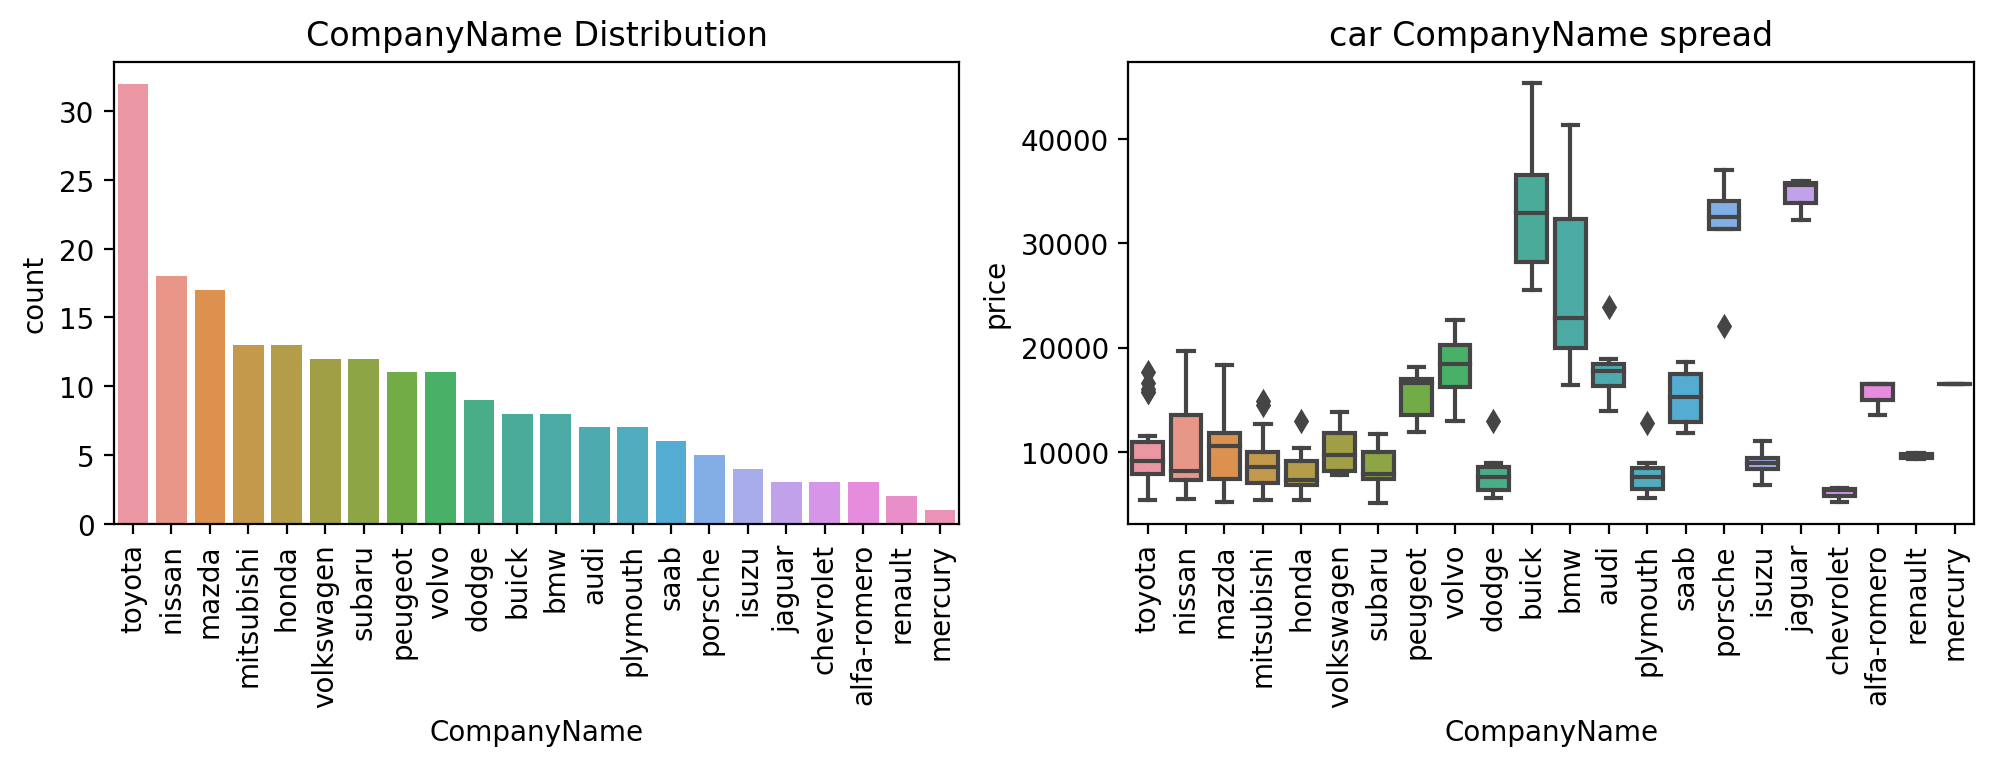

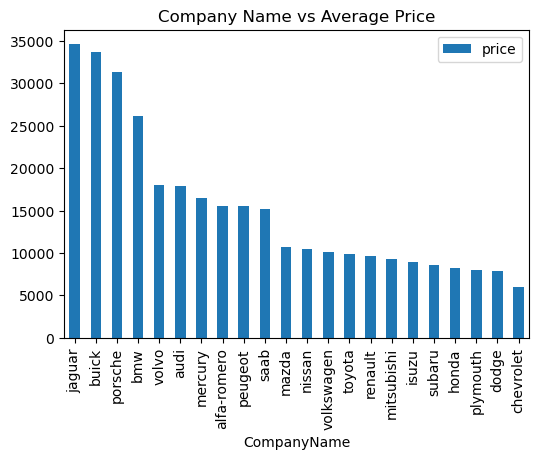

In [32]:
plt.figure(figsize=(12,3),dpi=200)

plt.subplot(1,2,1)
sns.countplot(x=cars_df['CompanyName'],order=cars_df['CompanyName'].value_counts().index)
plt.title("CompanyName Distribution")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(x=cars_df.CompanyName,y=cars_df.price,order=cars_df['CompanyName'].value_counts().index)
plt.title('car CompanyName spread')
plt.xticks(rotation=90)


plt.show()

avg_price = pd.DataFrame(cars_df.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
avg_price.plot.bar(figsize=(6,4))
plt.title('Company Name vs Average Price')

plt.show()

In [33]:
# toyota has highest number of sale whereas mercury has lowes sale
# bmw and buick has highest price range distribution whereas isuzu, cheverolet, renault and mercury has lowest price distribution
# jaguar has highest avarage price whereas cheverolet has lowest avarage price

In [34]:
# since company name has wide range of category we can create new column mentioning company class

In [35]:
top_class_l=['jaguar','buick','porsche','bmw']
middle_class_l=['volvo','audi','mercury','alfa-romero','peugeot','saab']
low_class_l=['mazda','nissan','volkswagen','toyota','renault','mitsubishi','isuzu','subaru','honda','plymouth','dodge','chevrolet']

In [36]:
def car_class(car):
    if car in top_class_l:
        return 'top class'
    elif car in middle_class_l:
        return 'middle class'
    else:
        if car in low_class_l:
            return 'low class'

In [37]:
car_class('plymouth')

'low class'

In [38]:
cars_df['carClass']=cars_df['CompanyName'].map(car_class)

### Car class and its relation with price

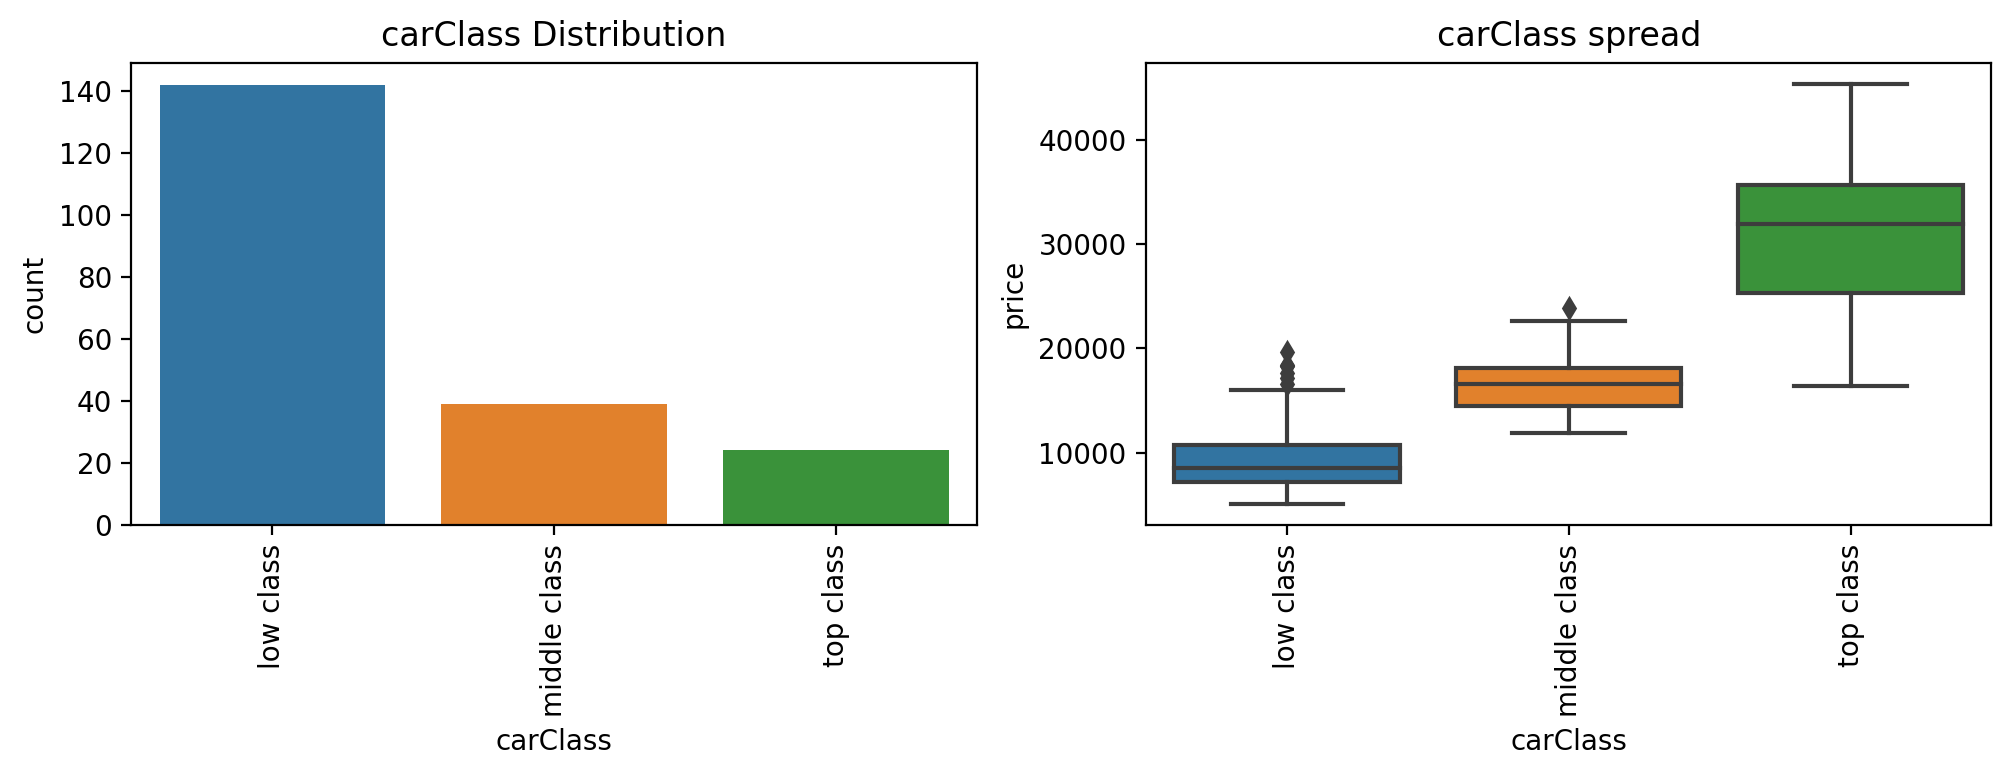

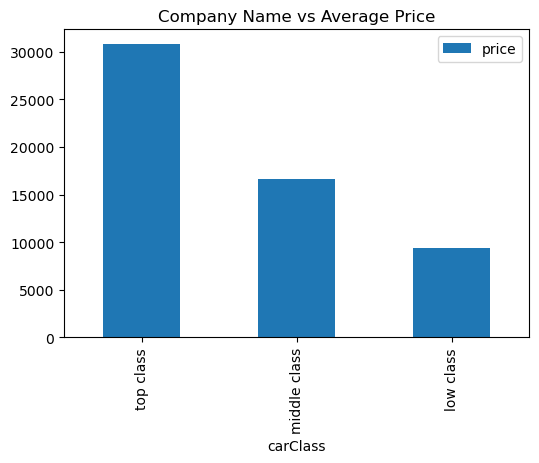

In [39]:
plt.figure(figsize=(12,3),dpi=200)

plt.subplot(1,2,1)
sns.countplot(x=cars_df['carClass'],order=cars_df['carClass'].value_counts().index)
plt.title("carClass Distribution")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(x=cars_df.carClass,y=cars_df.price,order=cars_df['carClass'].value_counts().index)
plt.title('carClass spread')
plt.xticks(rotation=90)


plt.show()

avg_price = pd.DataFrame(cars_df.groupby(['carClass'])['price'].mean().sort_values(ascending = False))
avg_price.plot.bar(figsize=(6,4))
plt.title('Company Name vs Average Price')

plt.show()

### B] Let study engine type and its relation with price

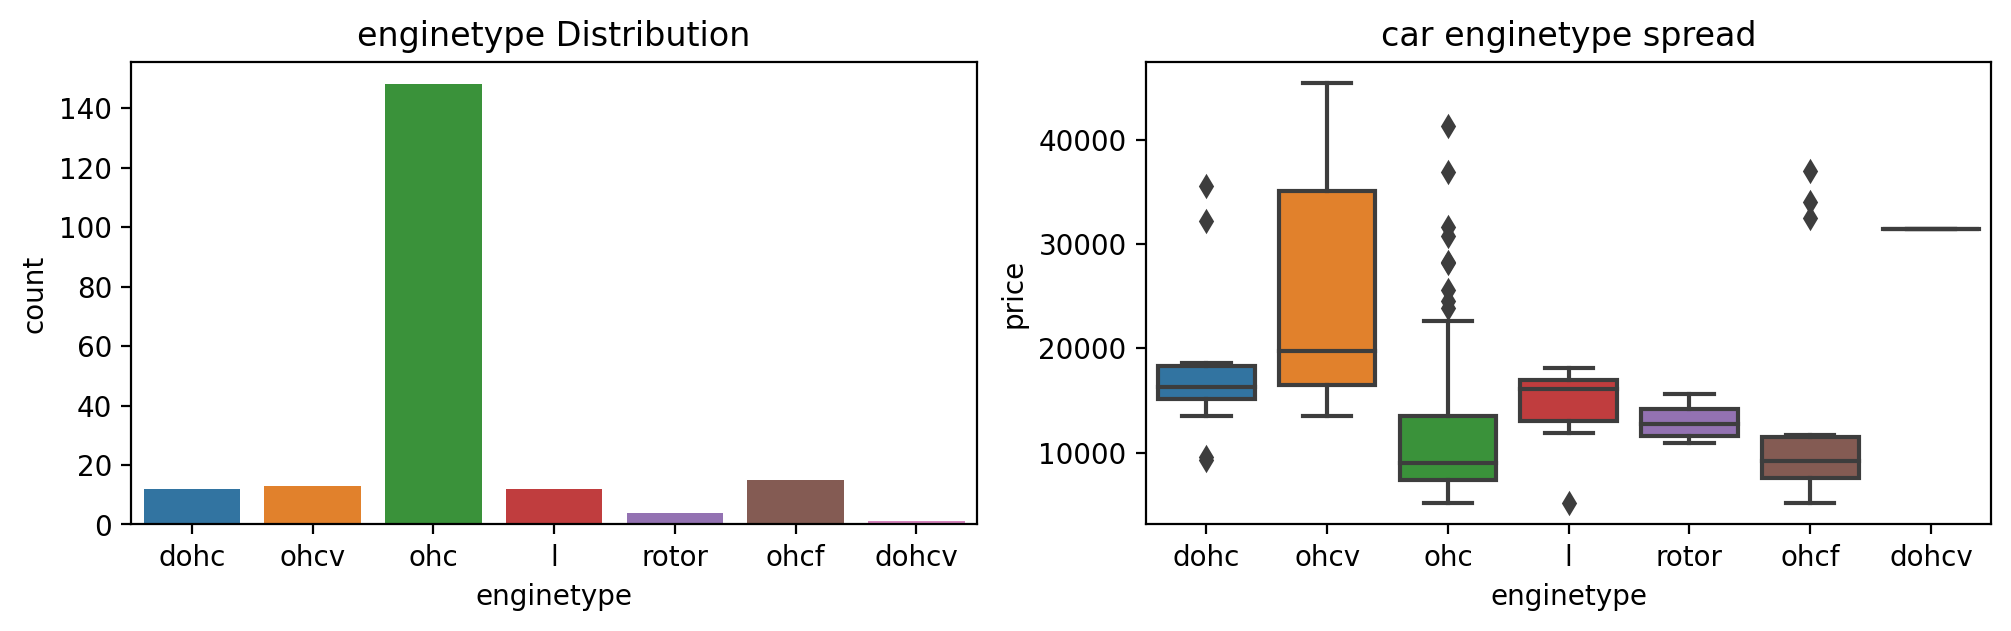

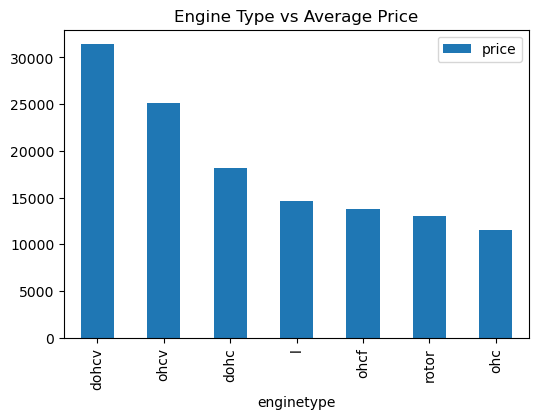

In [40]:
plt.figure(figsize=(12,3),dpi=200)

plt.subplot(1,2,1)
sns.countplot(x=cars_df['enginetype'])
plt.title("enginetype Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=cars_df.enginetype,y=cars_df.price)
plt.title('car enginetype spread')

plt.show()

avg_eng_price = pd.DataFrame(cars_df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
avg_eng_price.plot.bar(figsize=(6,4))
plt.title('Engine Type vs Average Price')

plt.show()

In [41]:
cars_df['enginetype'].value_counts(normalize=True)

ohc      0.721951
ohcf     0.073171
ohcv     0.063415
dohc     0.058537
l        0.058537
rotor    0.019512
dohcv    0.004878
Name: enginetype, dtype: float64

In [42]:
cars_df[cars_df['enginetype']=='dohcv']

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carClass
129,1,gas,porsche,std,two,hatchback,rwd,front,98.4,175.7,...,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5,top class


#### Inference:
* plot 1: ohc engine type is most accepted engine type

* plot 2: ohcv has wide range of price distribution

* dohcv has least price range distribution (it has only one record)

In [43]:
# avarage price of dohcv engine is very high (it has only one record)
# ohc engine type seems most favoured type

In [44]:
cars_df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [45]:
def engine_class(enginetype):
    if enginetype=='ohc':
        return 'ohc'
    else:
        return 'other'

In [46]:
cars_df['enginetype_class']=cars_df['enginetype'].map(engine_class)

In [47]:
cars_df['enginetype_class']

0      other
1      other
2      other
3        ohc
4        ohc
       ...  
200      ohc
201      ohc
202    other
203      ohc
204      ohc
Name: enginetype_class, Length: 205, dtype: object

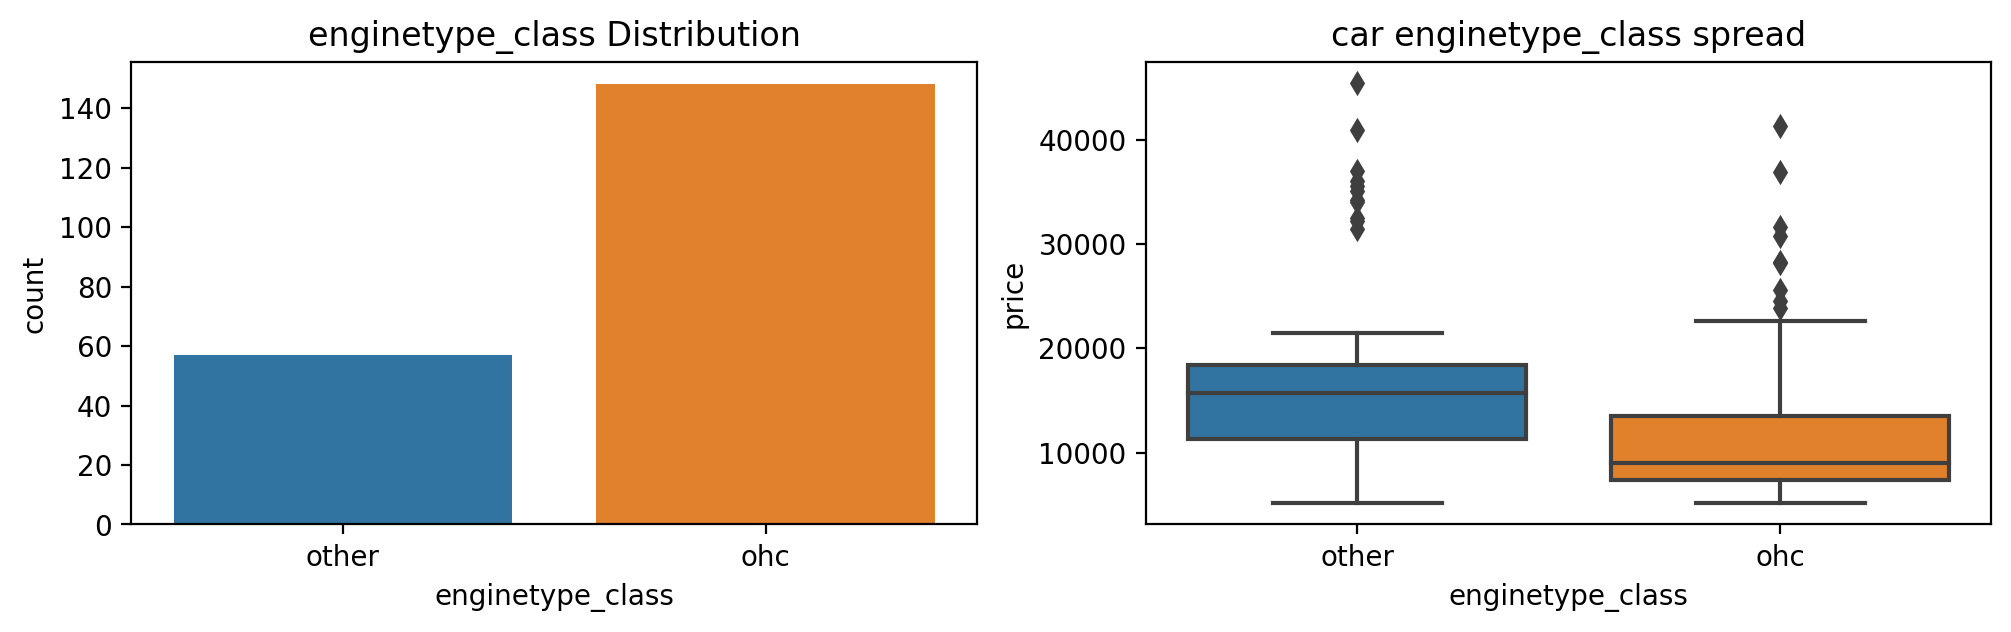

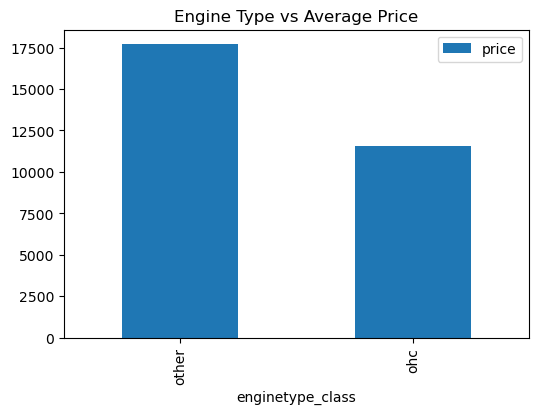

In [48]:
plt.figure(figsize=(12,3),dpi=200)

plt.subplot(1,2,1)
sns.countplot(x=cars_df['enginetype_class'])
plt.title("enginetype_class Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=cars_df.enginetype_class,y=cars_df.price)
plt.title('car enginetype_class spread')

plt.show()

avg_eng_price = pd.DataFrame(cars_df.groupby(['enginetype_class'])['price'].mean().sort_values(ascending = False))
avg_eng_price.plot.bar(figsize=(6,4))
plt.title('Engine Type vs Average Price')

plt.show()

### C] Let study car body and its relation with avarage price

In [49]:
cars_df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

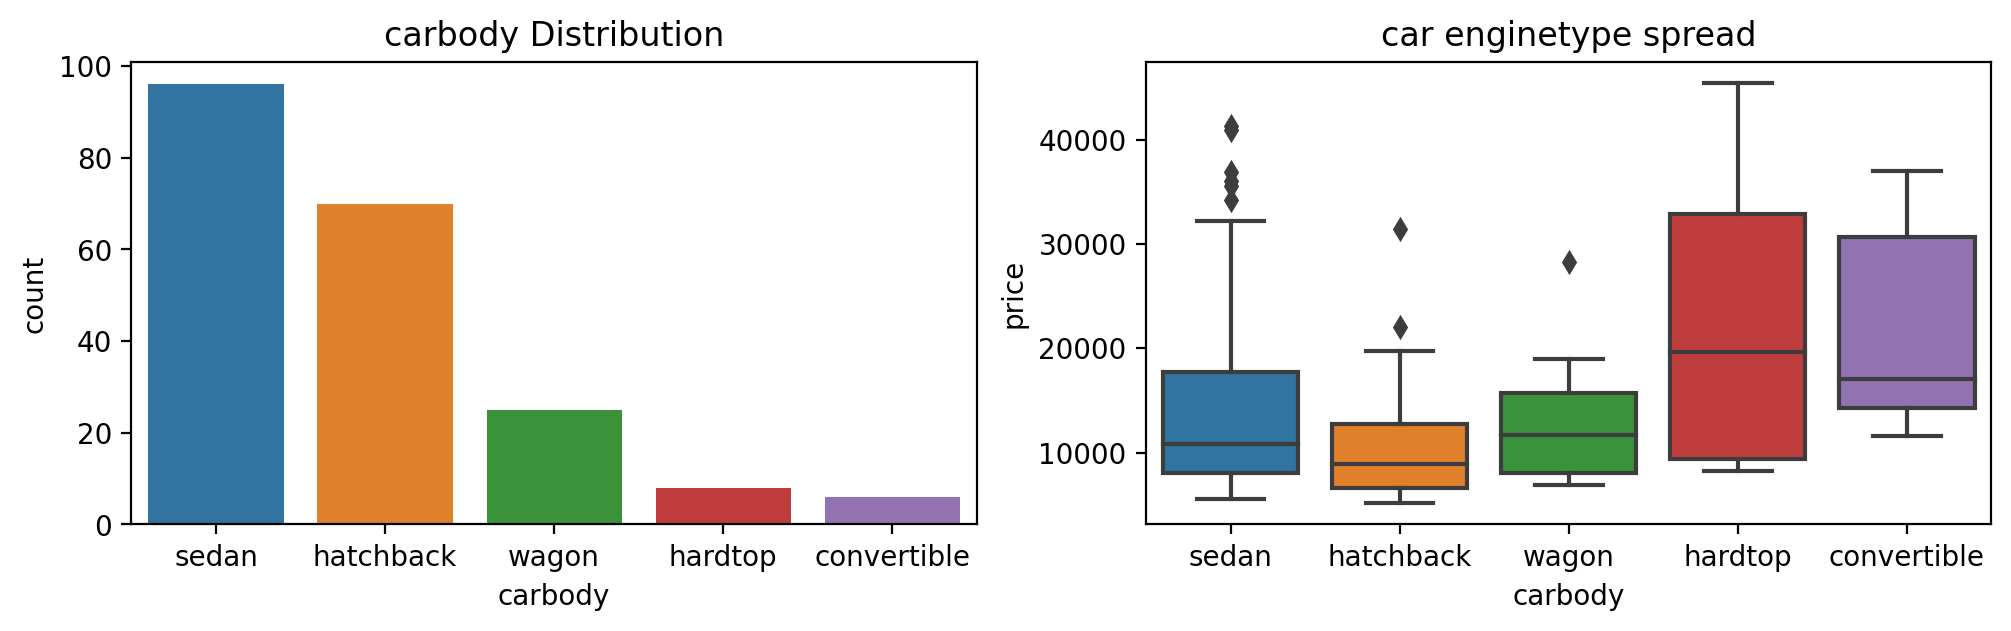

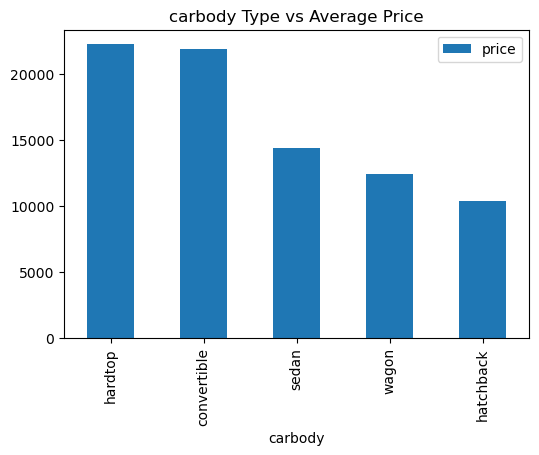

In [50]:
plt.figure(figsize=(12,3),dpi=200)

plt.subplot(1,2,1)
sns.countplot(x=cars_df['carbody'],order=cars_df['carbody'].value_counts().index)
plt.title("carbody Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=cars_df.carbody,y=cars_df.price,order=cars_df['carbody'].value_counts().index)
plt.title('car enginetype spread')

plt.show()

avg_eng_price = pd.DataFrame(cars_df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
avg_eng_price.plot.bar(figsize=(6,4))
plt.title('carbody Type vs Average Price')

plt.show()

In [51]:
# sedan car body type is most saled car body type comparative all the category whereas convertible car has lowest sale
# hardtop car  body type has wide range of price distribution whereas hatchback has less .
# hardtop has highest avarage price whereas hatchback has lowest avarage price

### D] Let study the cylinder number and its relation with price

In [52]:
cars_df['cylindernumber'].value_counts(normalize=True)

four      0.775610
six       0.117073
five      0.053659
eight     0.024390
two       0.019512
three     0.004878
twelve    0.004878
Name: cylindernumber, dtype: float64

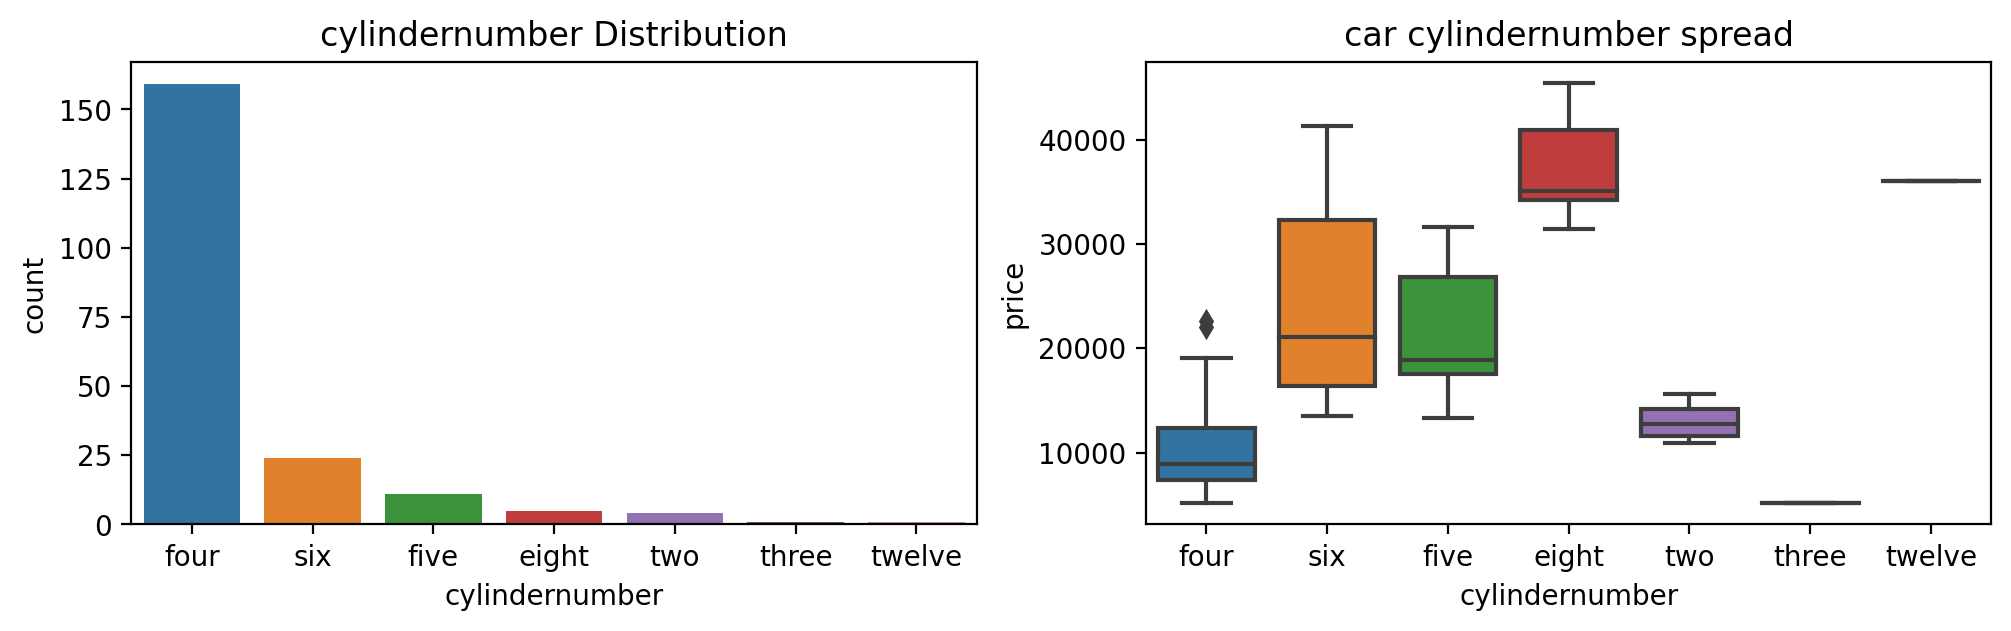

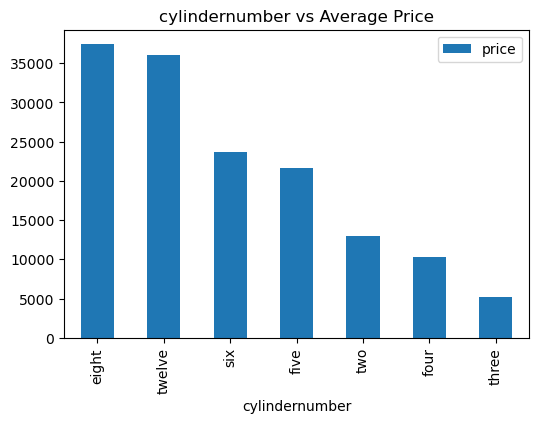

In [53]:
plt.figure(figsize=(12,3),dpi=200)

plt.subplot(1,2,1)
sns.countplot(x=cars_df['cylindernumber'],order=cars_df['cylindernumber'].value_counts().index)
plt.title("cylindernumber Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=cars_df.cylindernumber,y=cars_df.price,order=cars_df['cylindernumber'].value_counts().index)
plt.title('car cylindernumber spread')

plt.show()

avg_eng_price = pd.DataFrame(cars_df.groupby(['cylindernumber'])['price'].mean().sort_values(ascending = False))
avg_eng_price.plot.bar(figsize=(6,4))
plt.title('cylindernumber vs Average Price')

plt.show()

In [54]:
# four cylinder engine has highest sale whereas three and twelve cylinder engine has highest sale
# six cylinder engine has wide range of price distribution whereas three and tweleve cylinder engine has lowest price range distribution
# eight cylinder engine has highest avarage price whereas three cylinder engine has lowest avarage price

In [55]:
def cyl_num(x):
    if x=='two' or x=='three':
        return 'low'
    elif x=='five' or x=='six' or x=='eight' or x=='twelve':
        return 'high'
    else:
        if x=='four':
            return 'medium'

In [56]:
cars_df['cyl_num_class']=cars_df['cylindernumber'].map(cyl_num)

In [57]:
cars_df.head(5)

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carClass,enginetype_class,cyl_num_class
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495.0,middle class,other,medium
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500.0,middle class,other,medium
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500.0,middle class,other,high
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950.0,middle class,ohc,medium
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450.0,middle class,ohc,high


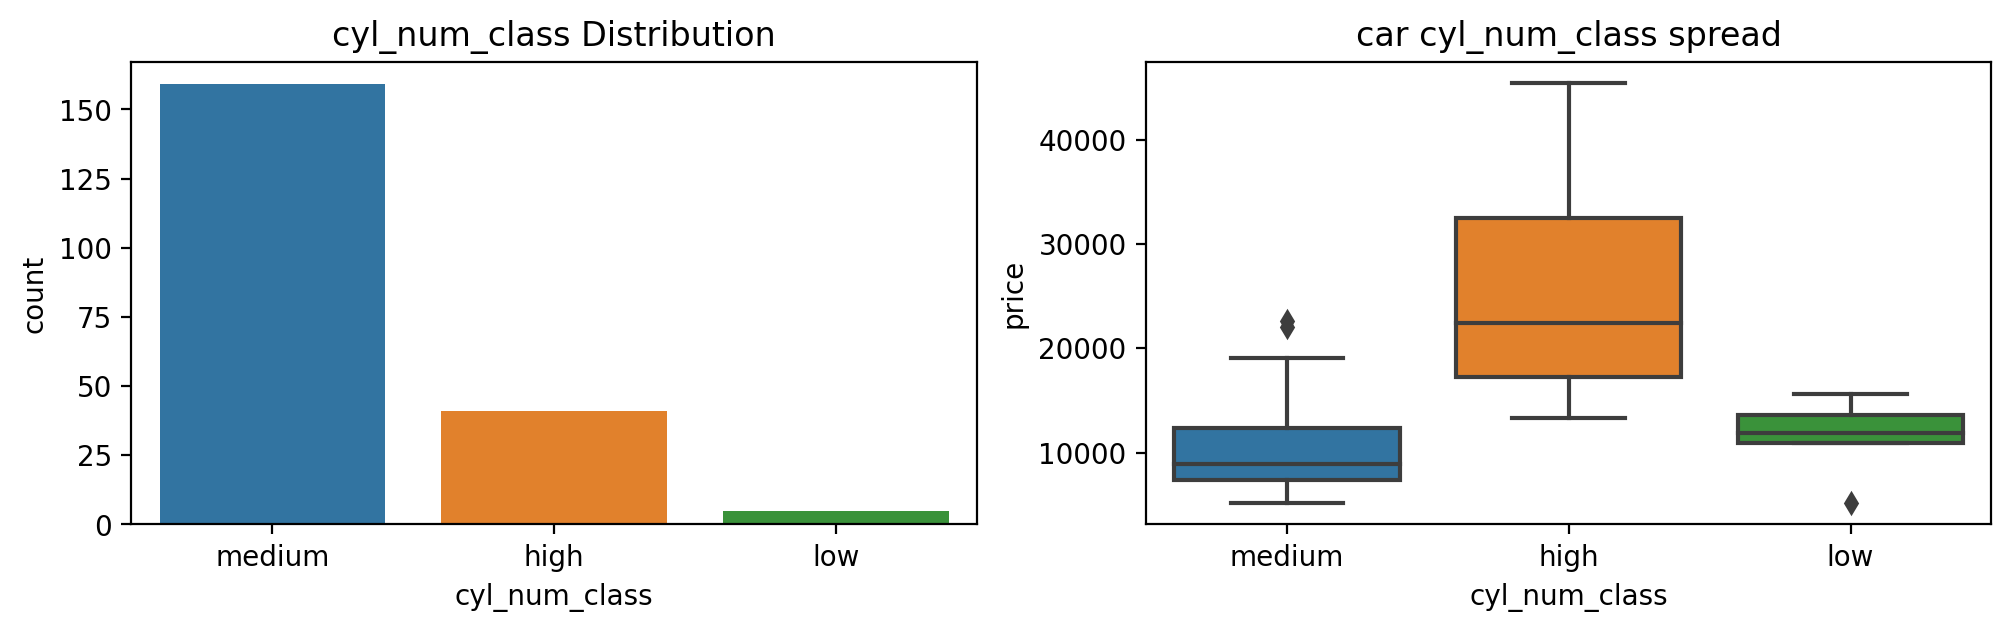

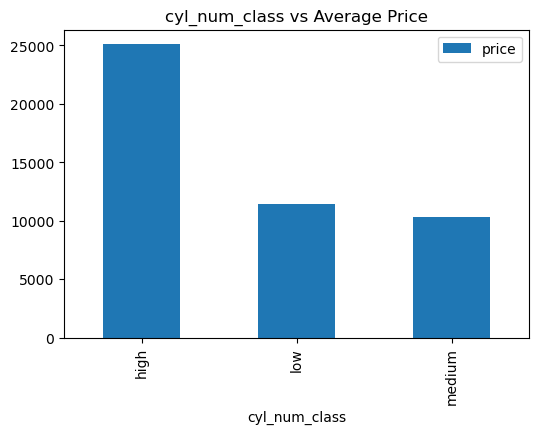

In [58]:
plt.figure(figsize=(12,3),dpi=200)

plt.subplot(1,2,1)
sns.countplot(x=cars_df['cyl_num_class'],order=cars_df['cyl_num_class'].value_counts().index)
plt.title("cyl_num_class Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=cars_df.cyl_num_class,y=cars_df.price,order=cars_df['cyl_num_class'].value_counts().index)
plt.title('car cyl_num_class spread')

plt.show()

avg_eng_price = pd.DataFrame(cars_df.groupby(['cyl_num_class'])['price'].mean().sort_values(ascending = False))
avg_eng_price.plot.bar(figsize=(6,4))
plt.title('cyl_num_class vs Average Price')

plt.show()

### G] Let study Fuel type and its relation with price

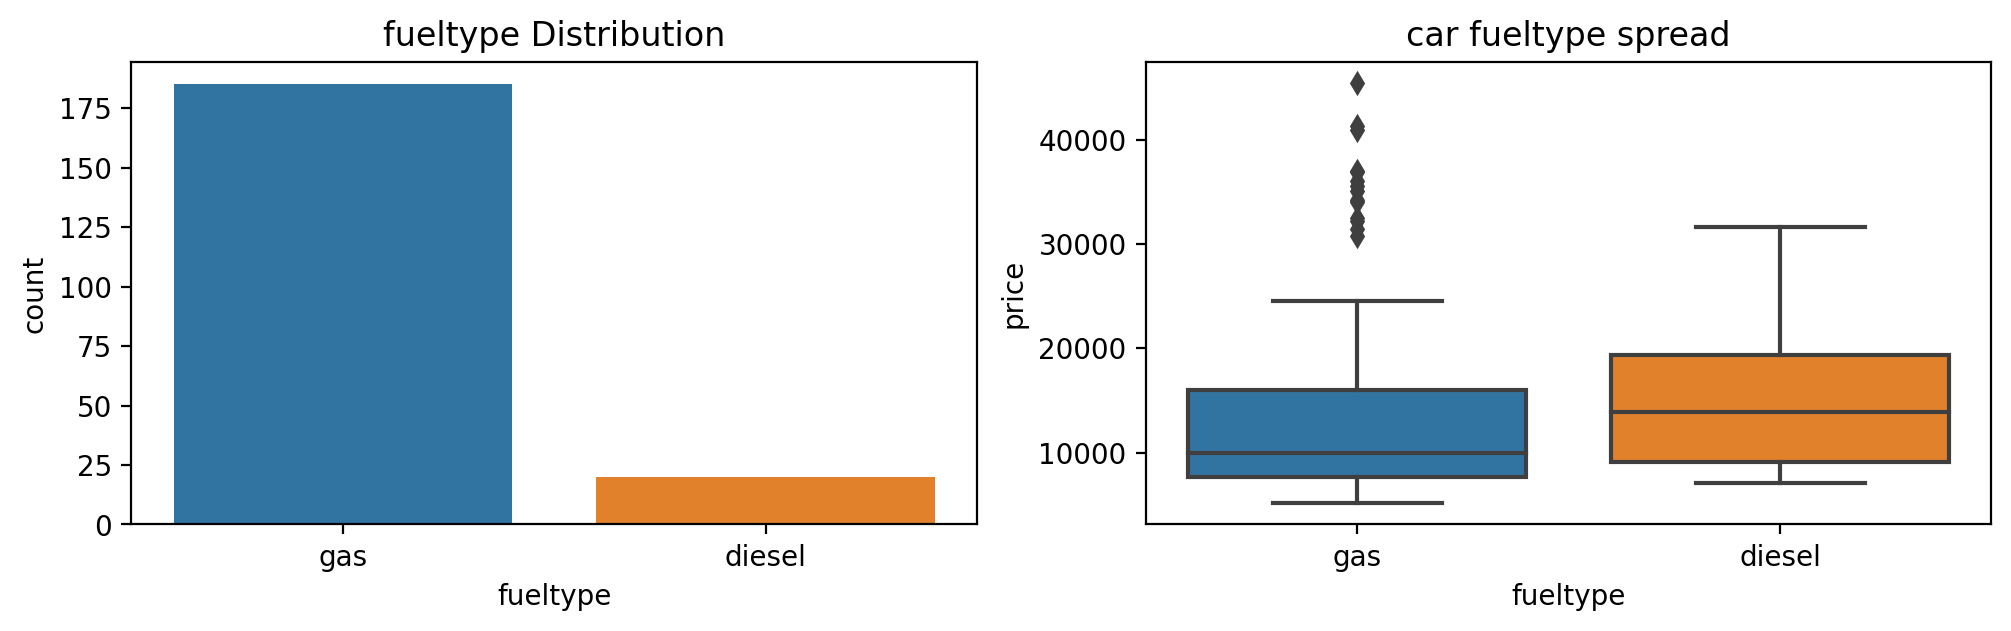

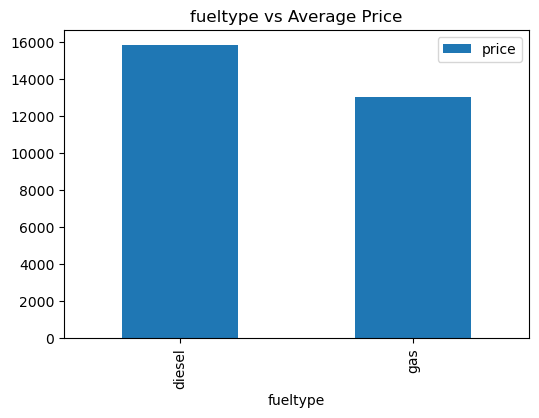

In [59]:
plt.figure(figsize=(12,3),dpi=200)

plt.subplot(1,2,1)
sns.countplot(x=cars_df['fueltype'],order=cars_df['fueltype'].value_counts().index)
plt.title("fueltype Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=cars_df.fueltype,y=cars_df.price,order=cars_df['fueltype'].value_counts().index)
plt.title('car fueltype spread')

plt.show()

avg_eng_price = pd.DataFrame(cars_df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
avg_eng_price.plot.bar(figsize=(6,4))
plt.title('fueltype vs Average Price')

plt.show()

In [60]:
# gas based car has highest sale comparative to diesel
# diseal car has wide range of distribution compare to gas
# avarage price of diesel based car is more compare to gas

### H] Let study the engine location and its relation with price

In [61]:
cars_df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

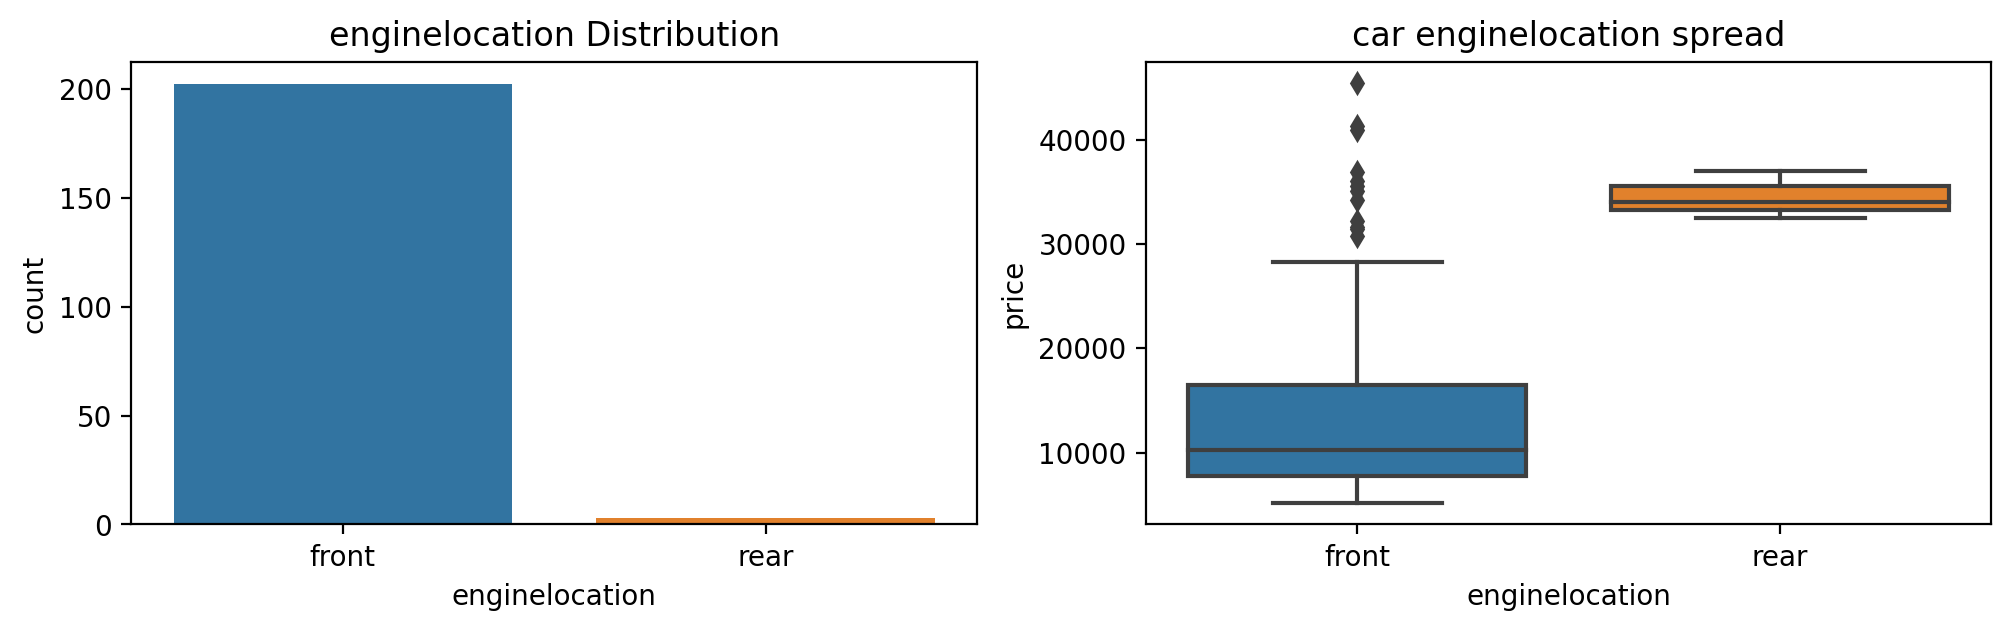

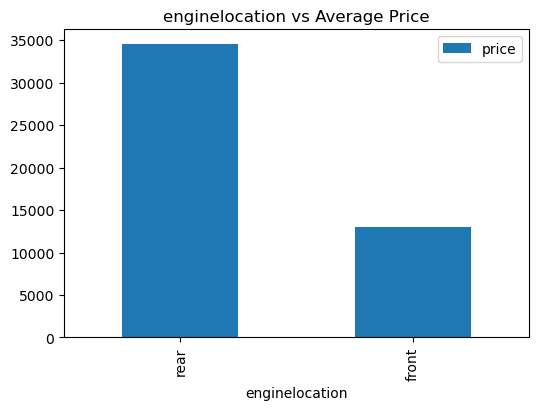

In [62]:
plt.figure(figsize=(12,3),dpi=200)

plt.subplot(1,2,1)
sns.countplot(x=cars_df['enginelocation'],order=cars_df['enginelocation'].value_counts().index)
plt.title("enginelocation Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=cars_df.enginelocation,y=cars_df.price,order=cars_df['enginelocation'].value_counts().index)
plt.title('car enginelocation spread')

plt.show()

avg_eng_price = pd.DataFrame(cars_df.groupby(['enginelocation'])['price'].mean().sort_values(ascending = False))
avg_eng_price.plot.bar(figsize=(6,4))
plt.title('enginelocation vs Average Price')

plt.show()

In [63]:
# car with front engine location have highest sale compare to rear end
# frong engine location has wide range of price distribution comapare to rear end
# avarage price of rare end engine location is high compare to front end engine location

### I] Let study the drive wheel and its relation with price

In [64]:
cars_df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

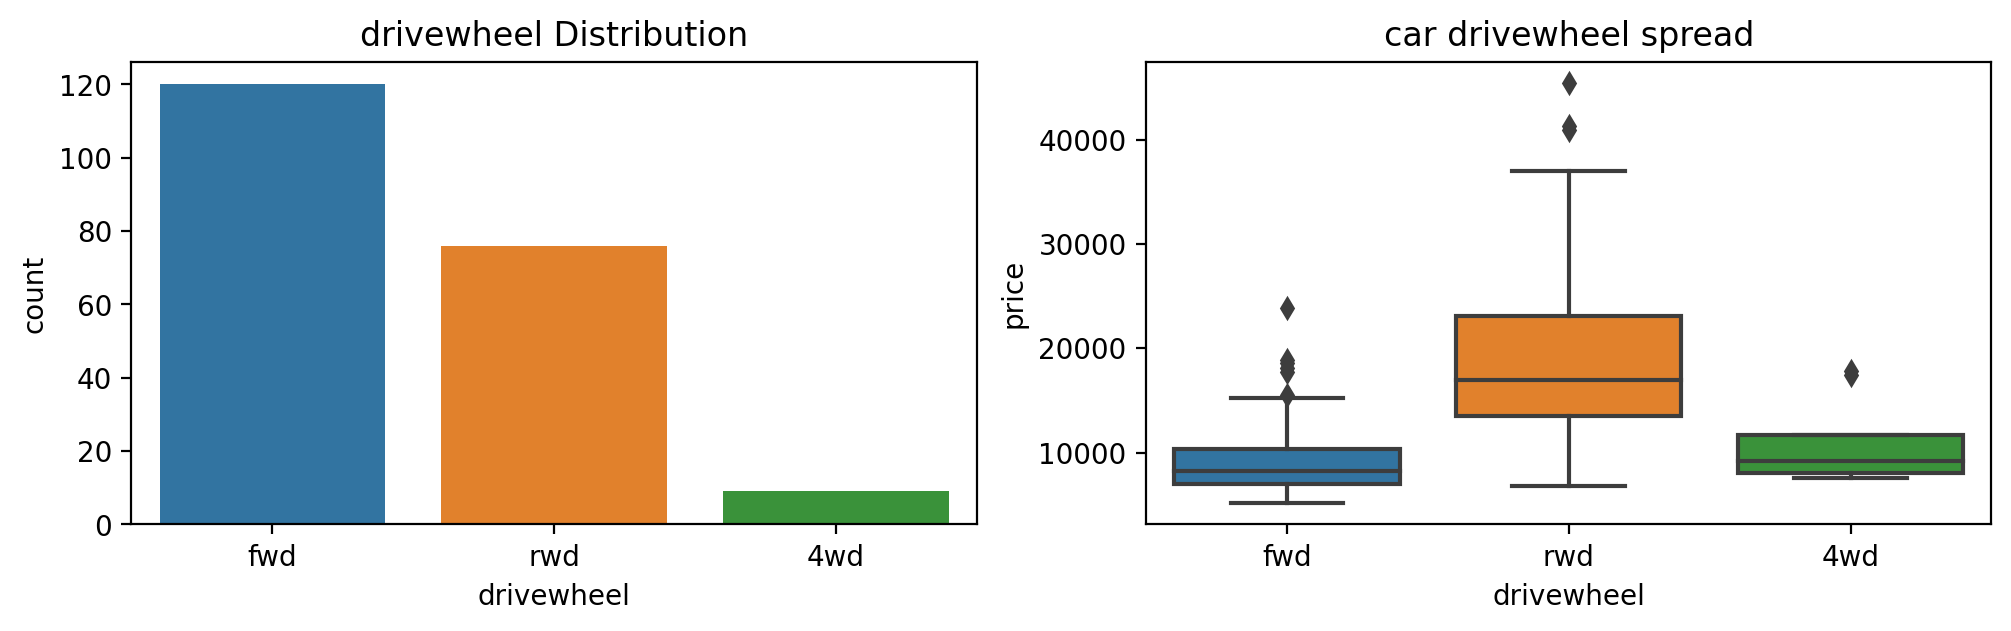

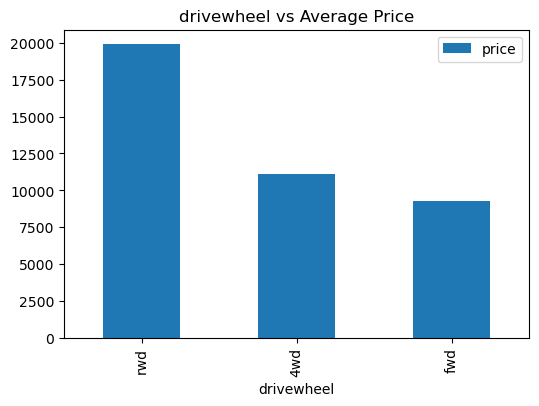

In [65]:
plt.figure(figsize=(12,3),dpi=200)

plt.subplot(1,2,1)
sns.countplot(x=cars_df['drivewheel'],order=cars_df['drivewheel'].value_counts().index)
plt.title("drivewheel Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=cars_df.drivewheel,y=cars_df.price,order=cars_df['drivewheel'].value_counts().index)
plt.title('car drivewheel spread')

plt.show()

avg_eng_price = pd.DataFrame(cars_df.groupby(['drivewheel'])['price'].mean().sort_values(ascending = False))
avg_eng_price.plot.bar(figsize=(6,4))
plt.title('drivewheel vs Average Price')

plt.show()

In [66]:
# fwd drive wheel has highest sale where as 4wd has lowest sale
# rwd has wide range of price distribution compare to others two
# avarage price of rwd is more compare to others two

### J] Let study the door number and its relation with price

In [67]:
cars_df.columns

Index(['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'carweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'carClass',
       'enginetype_class', 'cyl_num_class'],
      dtype='object')

In [68]:
cars_df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

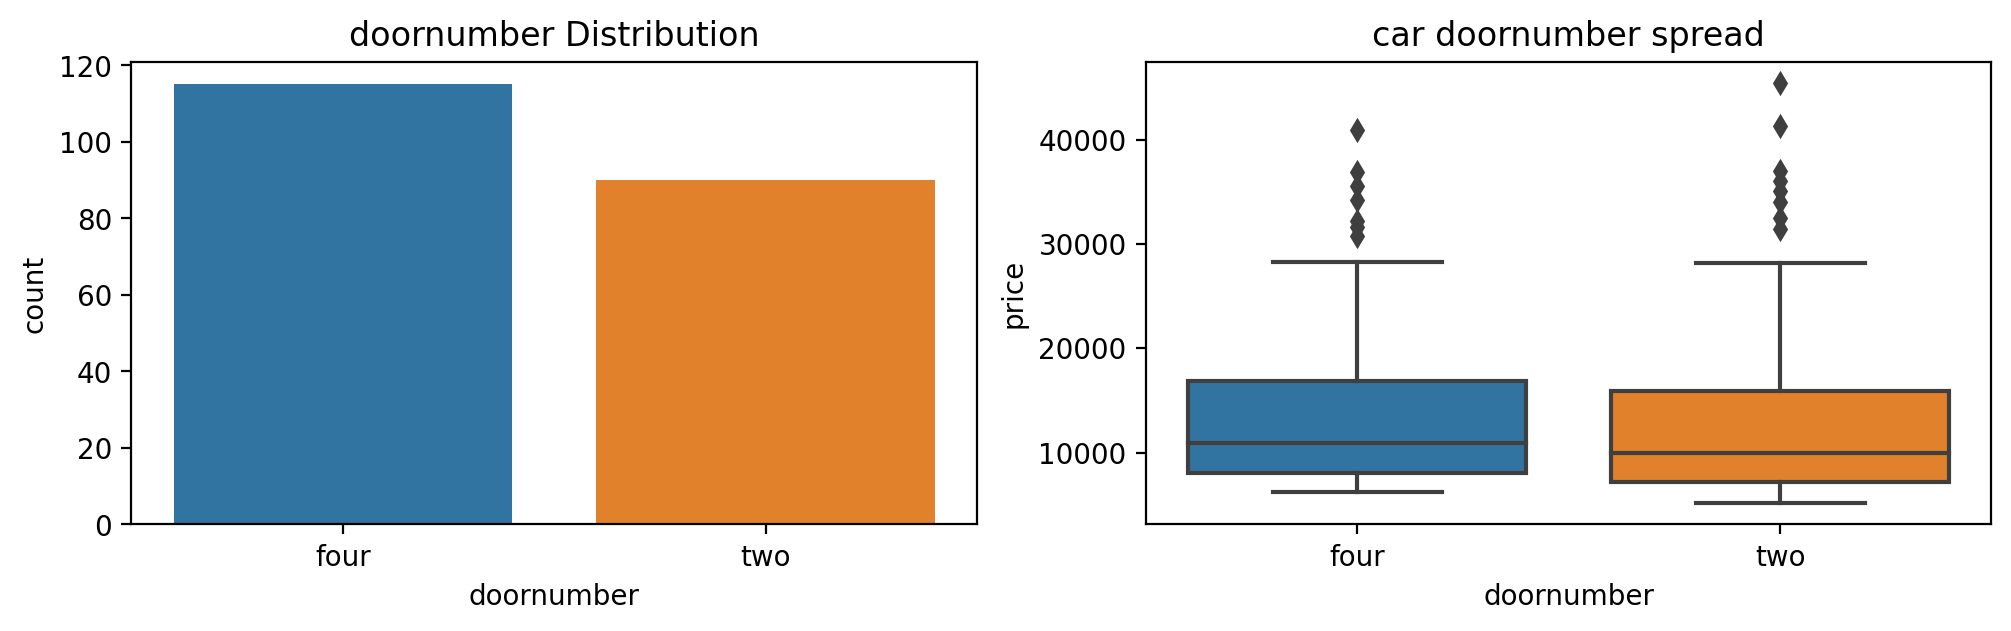

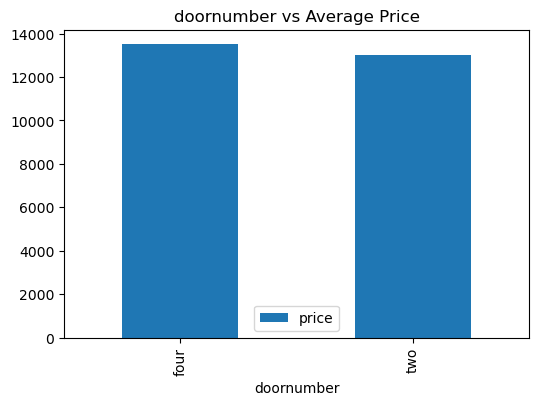

In [69]:
plt.figure(figsize=(12,3),dpi=200)

plt.subplot(1,2,1)
sns.countplot(x=cars_df['doornumber'],order=cars_df['doornumber'].value_counts().index)
plt.title("doornumber Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=cars_df.doornumber,y=cars_df.price,order=cars_df['doornumber'].value_counts().index)
plt.title('car doornumber spread')

plt.show()

avg_eng_price = pd.DataFrame(cars_df.groupby(['doornumber'])['price'].mean().sort_values(ascending = False))
avg_eng_price.plot.bar(figsize=(6,4))
plt.title('doornumber vs Average Price')

plt.show()

In [70]:
# four number of door has highest maximum sale
# two and four number both have same range of distribution
# avarage price is same for both

### K] Let Study the aspiration and its relation with price

In [71]:
cars_df.head(2)

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carClass,enginetype_class,cyl_num_class
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495.0,middle class,other,medium
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500.0,middle class,other,medium


In [72]:
cars_df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

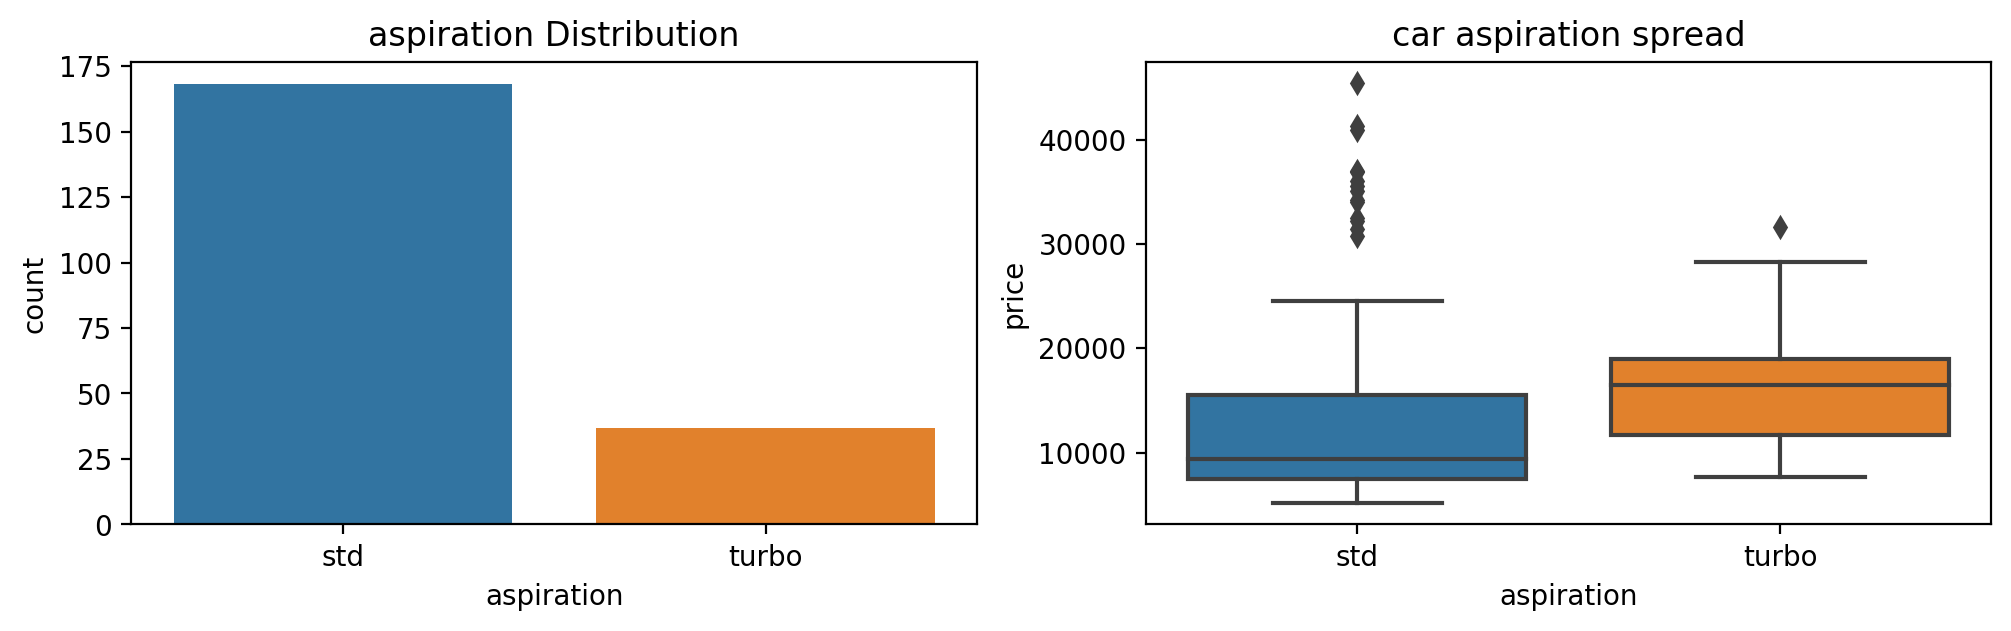

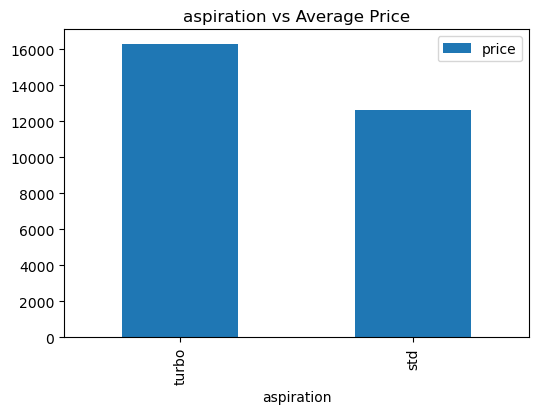

In [73]:
plt.figure(figsize=(12,3),dpi=200)

plt.subplot(1,2,1)
sns.countplot(x=cars_df['aspiration'],order=cars_df['aspiration'].value_counts().index)
plt.title("aspiration Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=cars_df.aspiration,y=cars_df.price,order=cars_df['aspiration'].value_counts().index)
plt.title('car aspiration spread')

#plt.show()

avg_eng_price = pd.DataFrame(cars_df.groupby(['aspiration'])['price'].mean().sort_values(ascending = False))
avg_eng_price.plot.bar(figsize=(6,4))
plt.title('aspiration vs Average Price')

plt.show()

In [74]:
# the std aspiration has highest sale compare to turbo
# both std and normal have same range of price distribution
# average of turbo is high compare to std

### Step 3 : ANOVA - To find specific categorical column who has significant relation with target column

In [75]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   CompanyName       205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  carweight         205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [76]:
cars_cat_df=cars_df[['carClass','enginetype_class','carbody','cyl_num_class','drivewheel','doornumber','aspiration','fueltype','fuelsystem','enginelocation','price']]

In [77]:
cars_cat_df.head()

,carClass,enginetype_class,carbody,cyl_num_class,drivewheel,doornumber,aspiration,fueltype,fuelsystem,enginelocation,price
0,middle class,other,convertible,medium,rwd,two,std,gas,mpfi,front,13495.0
1,middle class,other,convertible,medium,rwd,two,std,gas,mpfi,front,16500.0
2,middle class,other,hatchback,high,rwd,two,std,gas,mpfi,front,16500.0
3,middle class,ohc,sedan,medium,fwd,four,std,gas,mpfi,front,13950.0
4,middle class,ohc,sedan,high,4wd,four,std,gas,mpfi,front,17450.0


In [78]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'price ~ carClass + enginetype_class + carbody + cyl_num_class +drivewheel +doornumber + aspiration + fueltype + fuelsystem + enginelocation'
model = ols(formula, data=cars_cat_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                        sum_sq     df          F        PR(>F)
carClass          1.630929e+09    2.0  95.892541  3.259827e-29
enginetype_class  2.391808e+07    1.0   2.812588  9.523463e-02
carbody           6.485487e+07    4.0   1.906612  1.111639e-01
cyl_num_class     5.030514e+08    2.0  29.577551  7.408124e-12
drivewheel        6.600957e+07    2.0   3.881117  2.234704e-02
doornumber        3.350589e+07    1.0   3.940043  4.864361e-02
aspiration        7.403269e+07    1.0   8.705694  3.587080e-03
fueltype          2.932032e+08    1.0  34.478515  1.990915e-08
fuelsystem        4.136738e+08    7.0   6.949280  2.429696e-07
enginelocation    5.792693e+06    1.0   0.681178  4.102561e-01
Residual          1.556221e+09  183.0        NaN           NaN


* based on above result

* following features as significant effect on target column

1.carclass

2.cyl_num

3.fueltype

4.fuelsystem

In [79]:
cars_cat_df_final=cars_cat_df[['carClass','cyl_num_class','fueltype','fuelsystem']]

In [80]:
cars_cat_df_final.head()

,carClass,cyl_num_class,fueltype,fuelsystem
0,middle class,medium,gas,mpfi
1,middle class,medium,gas,mpfi
2,middle class,high,gas,mpfi
3,middle class,medium,gas,mpfi
4,middle class,high,gas,mpfi


### Step 4: Encoding categorical features

In [81]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# cars_cat_df

# Separate nominal and ordinal variables
nominal_columns = ['fueltype','fuelsystem']
ordinal_columns = ['carClass', 'cyl_num_class']

# Perform one-hot encoding (nominal encoding) on nominal variables
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
df_nominal_encoded = pd.DataFrame(onehot_encoder.fit_transform(cars_cat_df_final[nominal_columns]))
df_nominal_encoded.columns = onehot_encoder.get_feature_names_out(nominal_columns)

# Perform ordinal encoding on ordinal variables
ordinal_encoder = OrdinalEncoder(categories=[['low class', 'middle class', 'top class'], ['low', 'medium', 'high']])
df_ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(cars_cat_df_final[ordinal_columns]))
df_ordinal_encoded.columns = ordinal_columns

# Concatenate the encoded data back to the original DataFrame
df_encoded = pd.concat([df_nominal_encoded, df_ordinal_encoded], axis=1)

# Print the encoded DataFrame
print("Encoded DataFrame:")
#print(df_encoded)

Encoded DataFrame:


In [82]:
df_encoded.head()

,fueltype_gas,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carClass,cyl_num_class
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0


### Step 5 : EDA- Visualizing Numerical Data

In [83]:
cars_df.columns

Index(['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'carweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'carClass',
       'enginetype_class', 'cyl_num_class'],
      dtype='object')

In [84]:
list1=['wheelbase','carlength','carwidth','carheight','carweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [85]:
print(list1)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'carweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [86]:
def scatter(x,fig):
    plt.subplot(7,2,fig)
    plt.scatter(cars_df[x],cars_df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

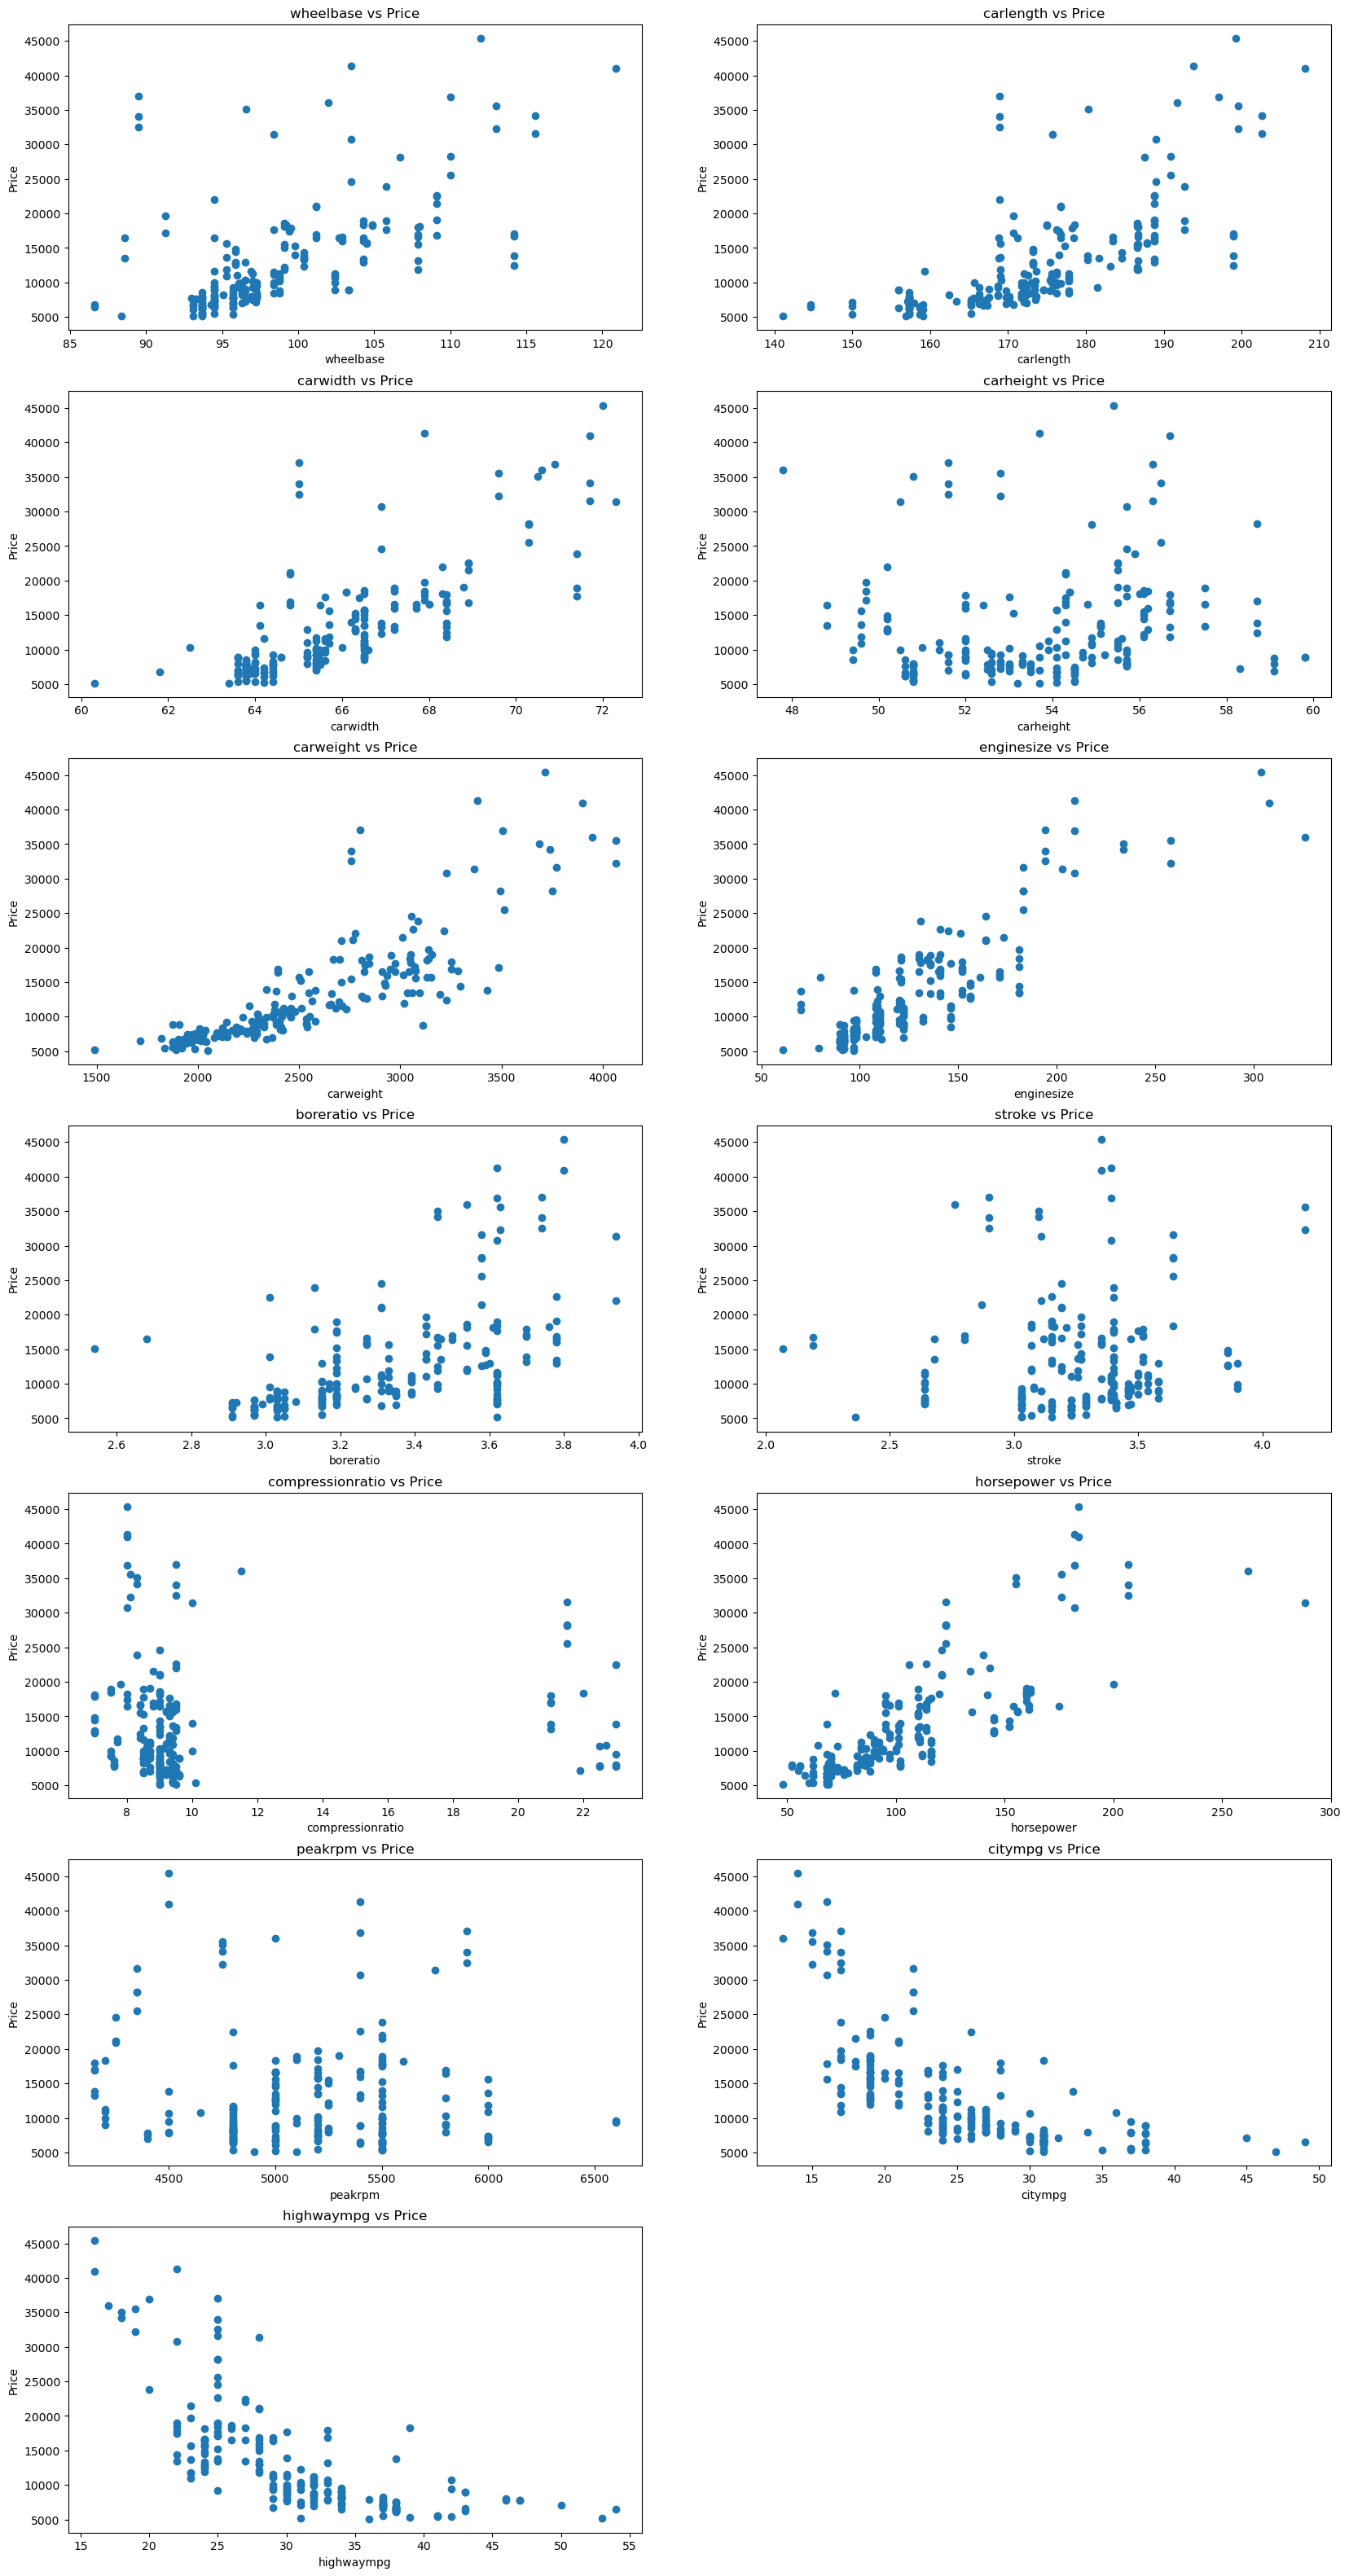

In [87]:
plt.figure(figsize=(20,40))

scatter('wheelbase',1)
scatter('carlength',2)
scatter('carwidth',3)
scatter('carheight',4)
scatter('carweight',5)
scatter('enginesize',6)
scatter('boreratio',7)
scatter('stroke',8)
scatter('compressionratio',9)
scatter('horsepower',10)
scatter('peakrpm',11)
scatter('citympg',12)
scatter('highwaympg',13)

In [88]:
### from above plots we can see 

# engine size, horse power, bore ratio has positive correlation with price

# city mpg and high way mpg has negative correlation

In [89]:
# creating mask
mask_lower_triangle = np.triu(np.ones_like(cars_df.corr())) 

#threshold=0.7

#mask_threshold=cars_df < threshold

# final_mask=mask_threshold & mask_lower_triangle

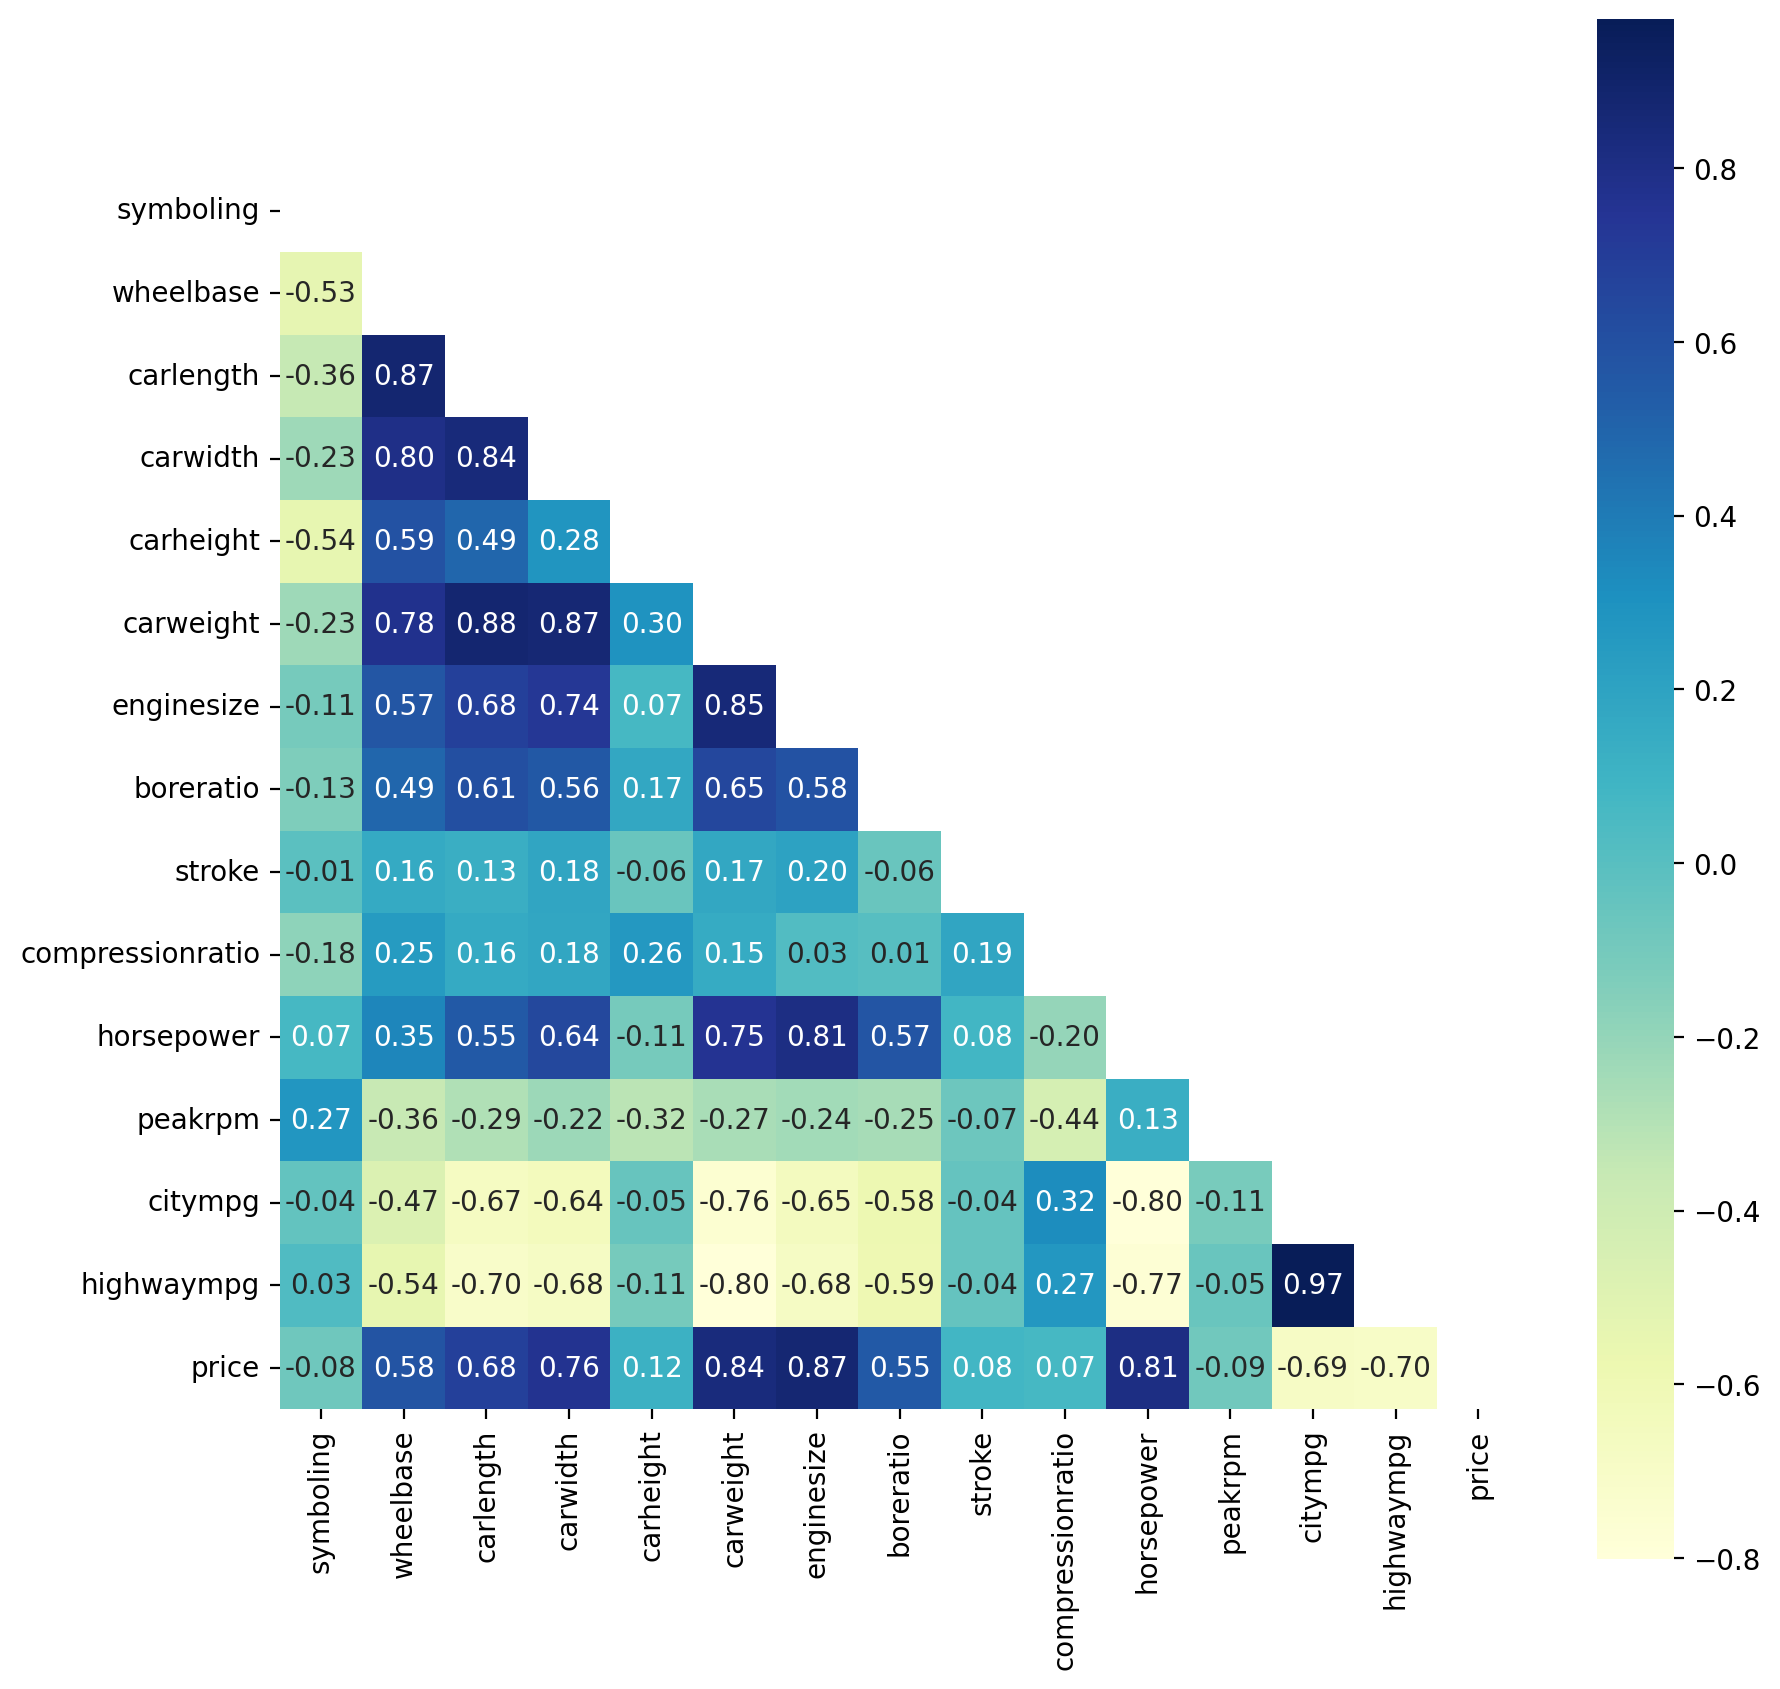

In [90]:
plt.figure(figsize = (10,10),dpi=200)

sns.heatmap(cars_df.corr(),annot = True,fmt=".2f", cmap="YlGnBu",square=True,cbar=True,mask=mask_lower_triangle)

plt.show()

In [91]:
### carweight, enginesize and horsepower has strong positive correlation with price

In [92]:
num_col_df=cars_df[list1]

In [93]:
num_col_df.head(5)

,wheelbase,carlength,carwidth,carheight,carweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### Step 6: Check for Multicolinearity

In [94]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Assuming you have your data in a pandas DataFrame named 'data'
# Separate the target variable (y) and predictor variables (X)
# For example:
X = num_col_df.drop('price', axis=1)
y = num_col_df['price']

# Add a constant term to the predictor variables to include an intercept term in the model
X_with_const = sm.add_constant(X)

# Calculate VIF for the predictor variables
vif_result = calculate_vif(X_with_const)

print(vif_result)

            Features          VIF
0              const  4699.328071
1          wheelbase     7.340949
2          carlength     9.422999
3           carwidth     5.586367
4          carheight     2.205975
5          carweight    16.413371
6         enginesize     6.658982
7          boreratio     2.103912
8             stroke     1.195781
9   compressionratio     2.175511
10        horsepower     8.247880
11           peakrpm     2.053763
12           citympg    27.128671
13        highwaympg    24.277439


In [95]:
cars_df.columns

Index(['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'carweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'carClass',
       'enginetype_class', 'cyl_num_class'],
      dtype='object')

In [96]:
cars_cont_df=cars_df[['carlength','carweight','carheight','enginesize','highwaympg','boreratio','stroke','compressionratio','peakrpm']]

In [97]:
cars_cont_df.head()

,carlength,carweight,carheight,enginesize,highwaympg,boreratio,stroke,compressionratio,peakrpm
0,168.8,2548,48.8,130,27,3.47,2.68,9.0,5000
1,168.8,2548,48.8,130,27,3.47,2.68,9.0,5000
2,171.2,2823,52.4,152,26,2.68,3.47,9.0,5000
3,176.6,2337,54.3,109,30,3.19,3.40,10.0,5500
4,176.6,2824,54.3,136,22,3.19,3.40,8.0,5500


### Step 7:  Distribution of continuous variables

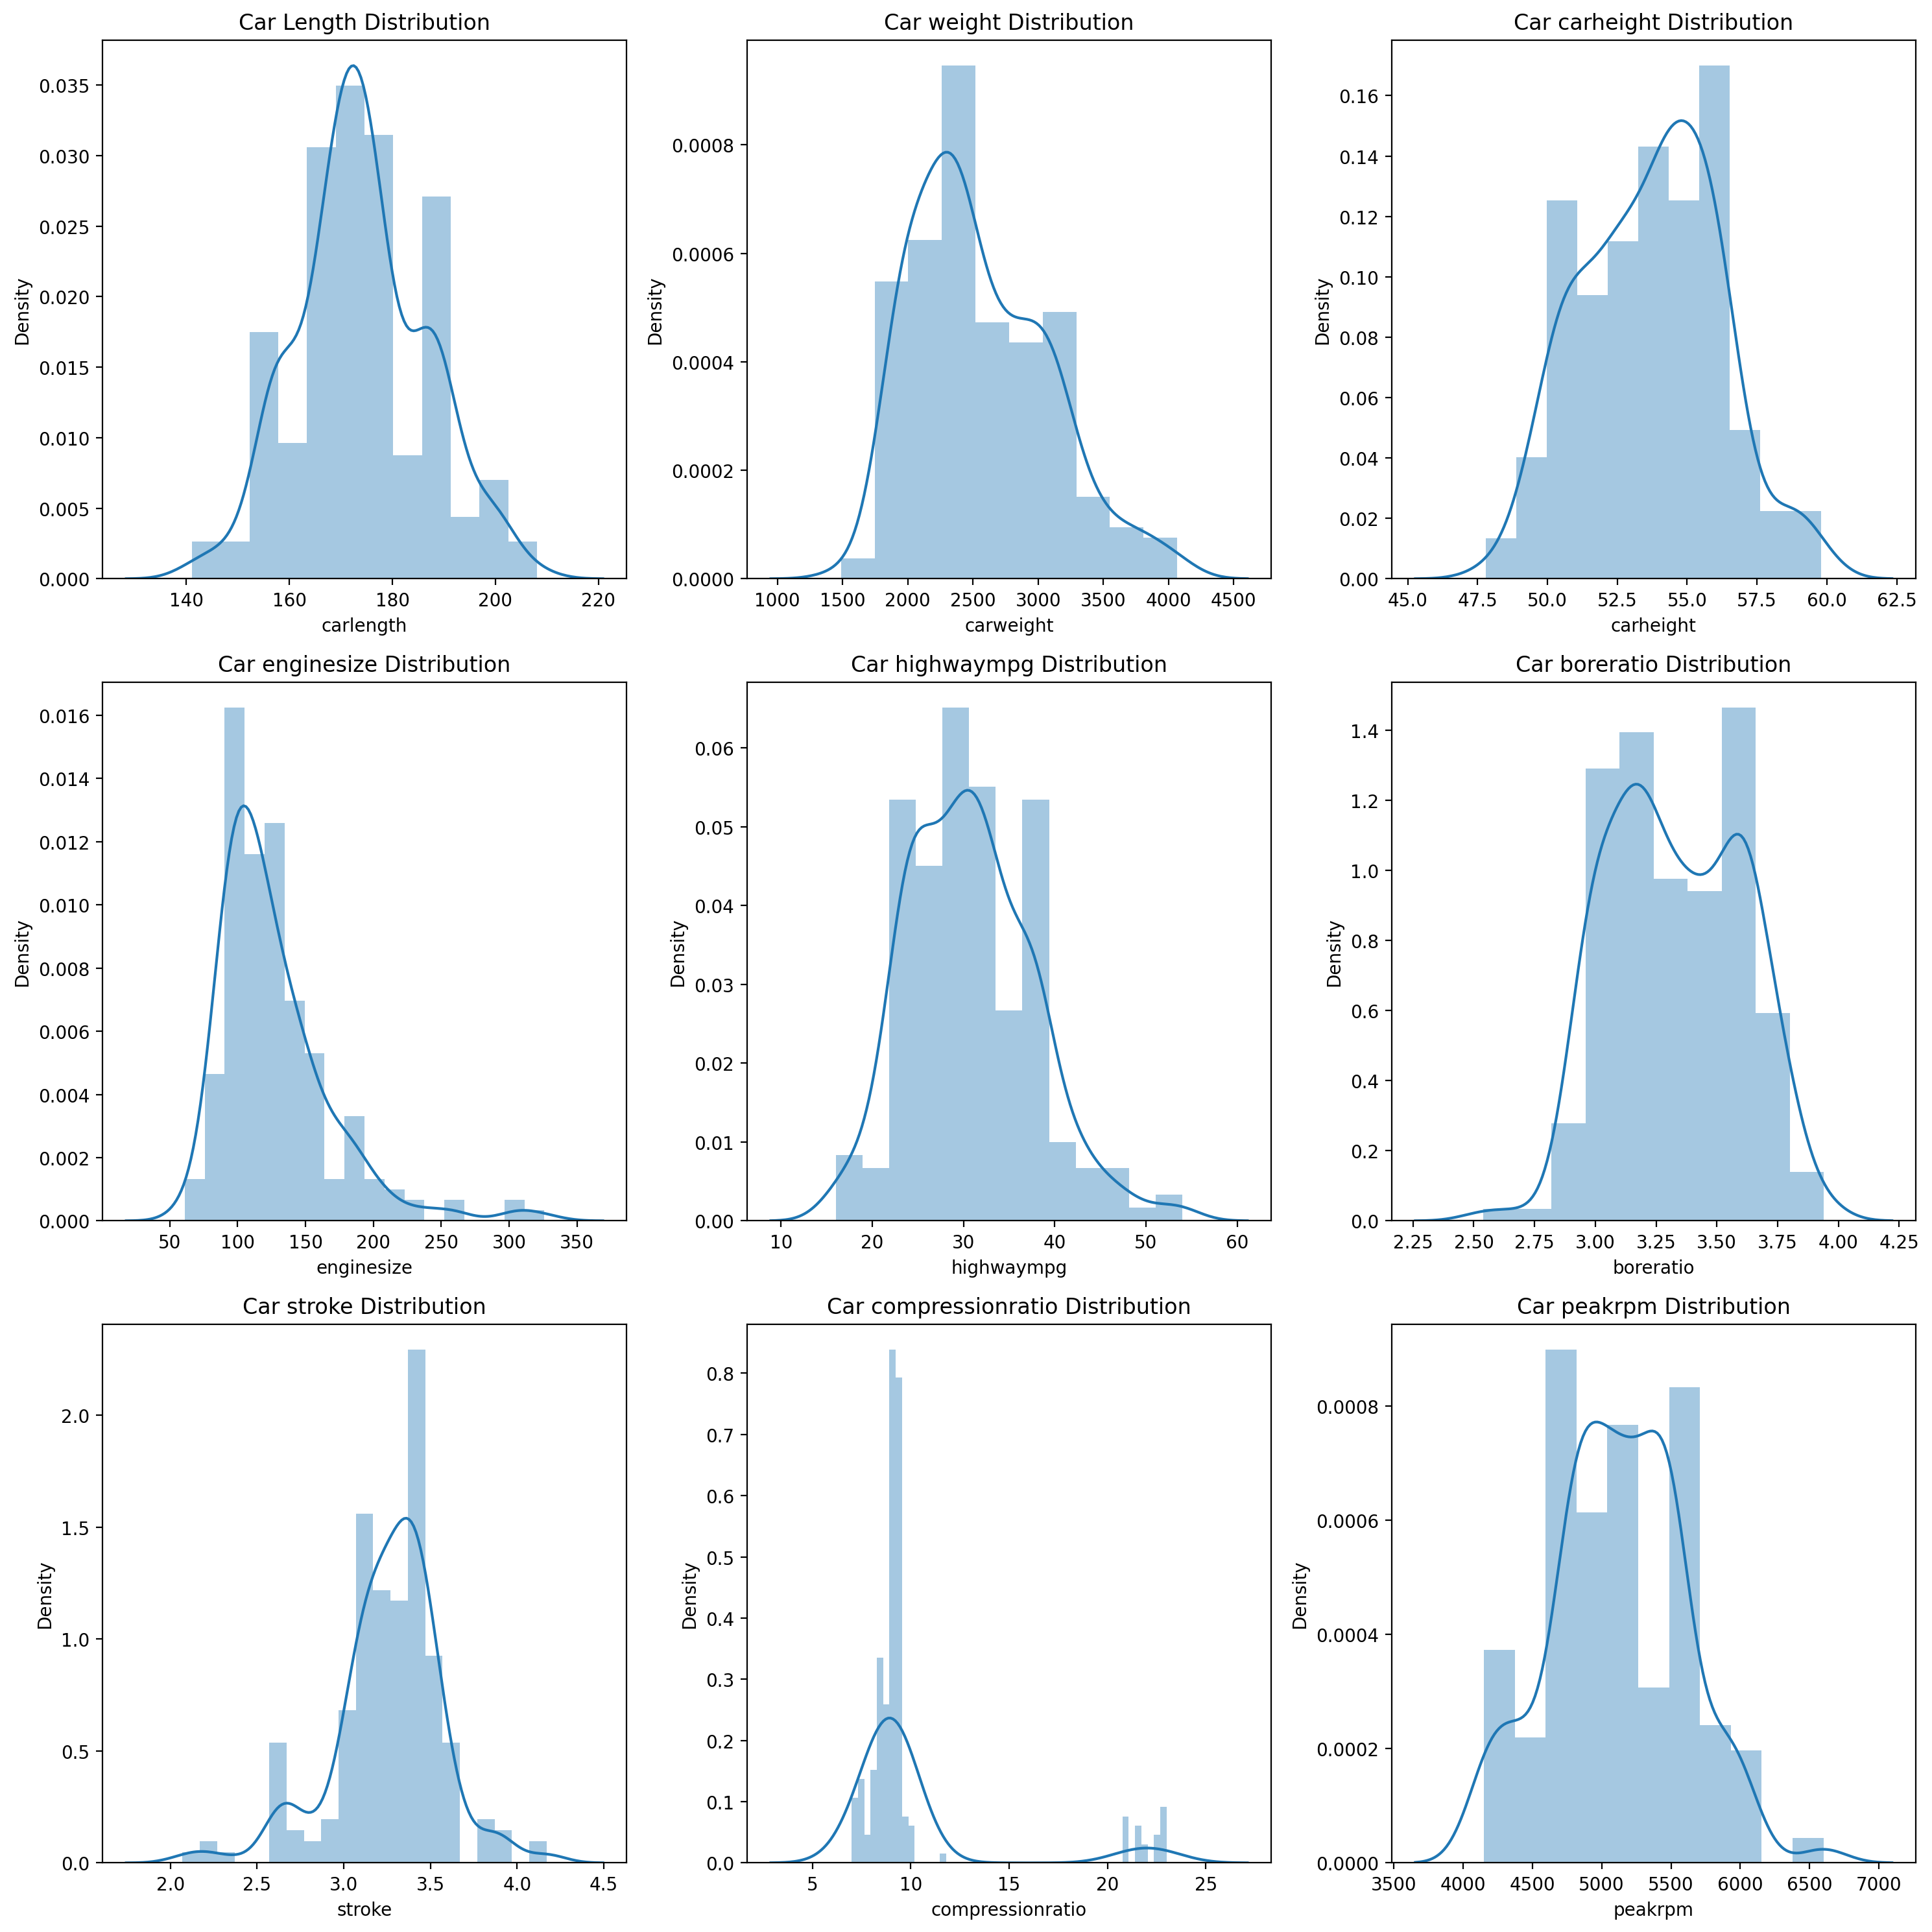

In [98]:
plt.figure(figsize=(15,15),dpi=200)

plt.subplot(3,3,1)
sns.distplot(cars_df.carlength)
plt.title("Car Length Distribution")

plt.subplot(3,3,2)
sns.distplot(cars_df.carweight)
plt.title("Car weight Distribution")

plt.subplot(3,3,3)
sns.distplot(cars_df.carheight)
plt.title("Car carheight Distribution")

#===========================================================================

plt.subplot(3,3,4)
sns.distplot(cars_df.enginesize)
plt.title("Car enginesize Distribution")

plt.subplot(3,3,5)
sns.distplot(cars_df.highwaympg)
plt.title("Car highwaympg Distribution")

plt.subplot(3,3,6)
sns.distplot(cars_df.boreratio)
plt.title("Car boreratio Distribution")

#================================================================================

plt.subplot(3,3,7)
sns.distplot(cars_df.stroke)
plt.title("Car stroke Distribution")

plt.subplot(3,3,8)
sns.distplot(cars_df.compressionratio)
plt.title("Car compressionratio Distribution")

plt.subplot(3,3,9)
sns.distplot(cars_df.peakrpm)
plt.title("Car peakrpm Distribution")

#==================================================================================
plt.tight_layout()

In [99]:
### Engine size and compression ration are right skewed

### we will transform the data to bring it under normal distribution

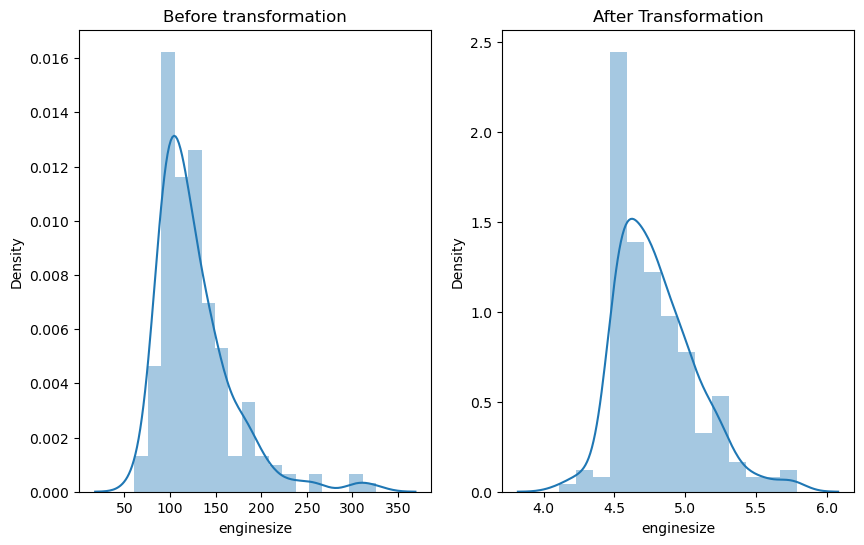

In [100]:
transformed_data_eng_size = np.log(cars_df.enginesize)

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.distplot(cars_df.enginesize)
plt.title("Before transformation")

plt.subplot(1,2,2)
sns.distplot(transformed_data_eng_size)
plt.title("After Transformation")

plt.show()

In [101]:
from scipy.stats import boxcox

In [102]:
transformed_data, lambda_value = boxcox(cars_df.compressionratio)
print("Estimated Lambda:", lambda_value)

Estimated Lambda: -3.0701036111613083


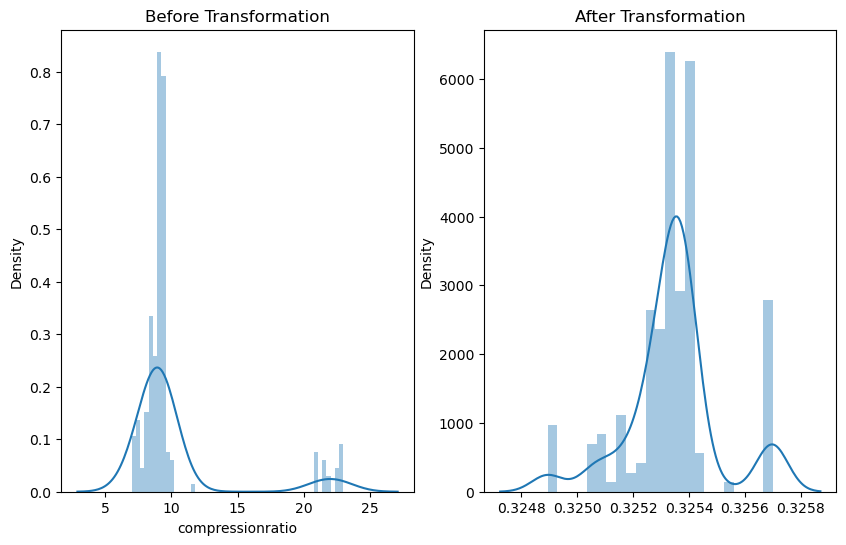

In [103]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.distplot(cars_df.compressionratio)
plt.title("Before Transformation")

plt.subplot(1,2,2)
sns.distplot(transformed_data)
plt.title('After Transformation')

plt.show()

In [104]:
cars_cont_df['enginesize']=transformed_data_eng_size

In [105]:
cars_cont_df['compressionratio']=transformed_data

In [106]:
cars_cont_df.head()

,carlength,carweight,carheight,enginesize,highwaympg,boreratio,stroke,compressionratio,peakrpm
0,168.8,2548,48.8,4.867534,27,3.47,2.68,0.325339,5000
1,168.8,2548,48.8,4.867534,27,3.47,2.68,0.325339,5000
2,171.2,2823,52.4,5.023881,26,2.68,3.47,0.325339,5000
3,176.6,2337,54.3,4.691348,30,3.19,3.40,0.325445,5500
4,176.6,2824,54.3,4.912655,22,3.19,3.40,0.325172,5500


### Step 8: Making final Dataframe

In [107]:
# Final dataframe

#will concatenate categorical,numerical independent varible with dependent target column

#cars_cont_df and df_encoded and price

final_df = pd.concat([cars_cont_df, df_encoded], axis=1)

In [108]:
final_df.head()

,carlength,carweight,carheight,enginesize,highwaympg,boreratio,stroke,compressionratio,peakrpm,fueltype_gas,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carClass,cyl_num_class
0,168.8,2548,48.8,4.867534,27,3.47,2.68,0.325339,5000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,168.8,2548,48.8,4.867534,27,3.47,2.68,0.325339,5000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,171.2,2823,52.4,5.023881,26,2.68,3.47,0.325339,5000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
3,176.6,2337,54.3,4.691348,30,3.19,3.40,0.325445,5500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,176.6,2824,54.3,4.912655,22,3.19,3.40,0.325172,5500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0


In [109]:
final_df['price']=cars_df['price']

In [110]:
final_df.head()

,carlength,carweight,carheight,enginesize,highwaympg,boreratio,stroke,compressionratio,peakrpm,fueltype_gas,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carClass,cyl_num_class,price
0,168.8,2548,48.8,4.867534,27,3.47,2.68,0.325339,5000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,13495.0
1,168.8,2548,48.8,4.867534,27,3.47,2.68,0.325339,5000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,16500.0
2,171.2,2823,52.4,5.023881,26,2.68,3.47,0.325339,5000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,16500.0
3,176.6,2337,54.3,4.691348,30,3.19,3.40,0.325445,5500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,13950.0
4,176.6,2824,54.3,4.912655,22,3.19,3.40,0.325172,5500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,17450.0


In [111]:
final_df = final_df.astype({"carlength":"float16","carweight":"float16","carheight":"float16","enginesize":"uint8",
               "highwaympg":"uint8","boreratio":"float16","stroke":"uint8","compressionratio":"uint8",
               "peakrpm":"uint16","fueltype_gas":"uint8","fuelsystem_2bbl":"uint8","fuelsystem_4bbl":"uint8",
               "fuelsystem_idi":"uint8","fuelsystem_mfi":"uint8","fuelsystem_mpfi":"uint8",
               "fuelsystem_spdi":"uint8","fuelsystem_spfi":"uint8","carClass":"uint8","cyl_num_class":"uint8","price":"uint16"})

In [112]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carlength         205 non-null    float16
 1   carweight         205 non-null    float16
 2   carheight         205 non-null    float16
 3   enginesize        205 non-null    uint8  
 4   highwaympg        205 non-null    uint8  
 5   boreratio         205 non-null    float16
 6   stroke            205 non-null    uint8  
 7   compressionratio  205 non-null    uint8  
 8   peakrpm           205 non-null    uint16 
 9   fueltype_gas      205 non-null    uint8  
 10  fuelsystem_2bbl   205 non-null    uint8  
 11  fuelsystem_4bbl   205 non-null    uint8  
 12  fuelsystem_idi    205 non-null    uint8  
 13  fuelsystem_mfi    205 non-null    uint8  
 14  fuelsystem_mpfi   205 non-null    uint8  
 15  fuelsystem_spdi   205 non-null    uint8  
 16  fuelsystem_spfi   205 non-null    uint8  
 1

In [113]:
final_df.columns

Index(['carlength', 'carweight', 'carheight', 'enginesize', 'highwaympg',
       'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'fueltype_gas',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'carClass', 'cyl_num_class', 'price'],
      dtype='object')

### Step 9: Split the data into features and target

In [114]:
X=final_df.drop('price',axis=1)
Y=final_df['price']

In [115]:
X.head()

,carlength,carweight,carheight,enginesize,highwaympg,boreratio,stroke,compressionratio,peakrpm,fueltype_gas,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carClass,cyl_num_class
0,168.750,2548.0,48.81250,4,27,3.470703,2,0,5000,1,0,0,0,0,1,0,0,1,1
1,168.750,2548.0,48.81250,4,27,3.470703,2,0,5000,1,0,0,0,0,1,0,0,1,1
2,171.250,2824.0,52.40625,5,26,2.679688,3,0,5000,1,0,0,0,0,1,0,0,1,2
3,176.625,2336.0,54.31250,4,30,3.189453,3,0,5500,1,0,0,0,0,1,0,0,1,1
4,176.625,2824.0,54.31250,4,22,3.189453,3,0,5500,1,0,0,0,0,1,0,0,1,2


In [116]:
X.shape

(205, 19)

In [117]:
Y.head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: uint16

### Step 10: Splitting data into training dataset and testing dataset

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler , MinMaxScaler


In [119]:
# let split the data into train and test

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=41)

In [120]:
#X_train.reset_index(inplace=True,drop=True)

In [121]:
#X_test.reset_index(inplace=True,drop=True)

### step 11: feature scaling

In [122]:
Column_to_scale=['carlength','carweight','carheight','enginesize','highwaympg','boreratio','stroke','compressionratio','peakrpm']

Column_not_to_scale=['fueltype_gas','fuelsystem_2bbl','fuelsystem_4bbl','fuelsystem_idi','fuelsystem_mfi','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','carClass','cyl_num_class']

In [123]:
scaler=MinMaxScaler()

In [124]:
X_train.head(2)

,carlength,carweight,carheight,enginesize,highwaympg,boreratio,stroke,compressionratio,peakrpm,fueltype_gas,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carClass,cyl_num_class
190,165.75,2220.0,51.40625,4,29,3.189453,3,0,5500,1,0,0,0,0,1,0,0,0,1
106,178.50,3140.0,49.68750,5,25,3.429688,3,0,5200,1,0,0,0,0,1,0,0,0,2


In [125]:
new_x_train_FT=X_train[Column_to_scale]

In [126]:
new_x_train_FT.head(2)

,carlength,carweight,carheight,enginesize,highwaympg,boreratio,stroke,compressionratio,peakrpm
190,165.75,2220.0,51.40625,4,29,3.189453,3,0,5500
106,178.50,3140.0,49.68750,5,25,3.429688,3,0,5200


In [127]:
# Fit the scaler on the training data and transform the features
X_train_scaled_cont = scaler.fit_transform(new_x_train_FT)

In [128]:
X_train_scaled_cont=pd.DataFrame(X_train_scaled_cont,columns=Column_to_scale,index=new_x_train_FT.index)

In [129]:
X_train_scaled_cont.head(2)

,carlength,carweight,carheight,enginesize,highwaympg,boreratio,stroke,compressionratio,peakrpm
190,0.367537,0.283941,0.235795,0.0,0.351351,0.464435,0.5,0.0,0.729730
106,0.557836,0.640807,0.079545,1.0,0.243243,0.635983,0.5,0.0,0.567568


In [130]:
new_x_train_NFT=X_train[Column_not_to_scale]

In [131]:
new_x_train_NFT.head(2)

,fueltype_gas,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carClass,cyl_num_class
190,1,0,0,0,0,1,0,0,0,1
106,1,0,0,0,0,1,0,0,0,2


In [132]:
### now we will concat the two dataframe
final_X_train=pd.concat([X_train_scaled_cont,new_x_train_NFT],axis=1)

In [133]:
final_X_train.head(2)

,carlength,carweight,carheight,enginesize,highwaympg,boreratio,stroke,compressionratio,peakrpm,fueltype_gas,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carClass,cyl_num_class
190,0.367537,0.283941,0.235795,0.0,0.351351,0.464435,0.5,0.0,0.729730,1,0,0,0,0,1,0,0,0,1
106,0.557836,0.640807,0.079545,1.0,0.243243,0.635983,0.5,0.0,0.567568,1,0,0,0,0,1,0,0,0,2


In [134]:
final_X_train.shape

(164, 19)

In [135]:
X_test.head(2)

,carlength,carweight,carheight,enginesize,highwaympg,boreratio,stroke,compressionratio,peakrpm,fueltype_gas,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carClass,cyl_num_class
96,165.25,1971.0,54.5,4,37,3.150391,3,0,5200,1,1,0,0,0,0,0,0,0,1
63,177.75,2444.0,55.5,4,42,3.390625,3,0,4650,0,0,0,1,0,0,0,0,0,1


In [136]:
new_x_test_FT=X_test[Column_to_scale]
new_x_test_FT.head(2)

,carlength,carweight,carheight,enginesize,highwaympg,boreratio,stroke,compressionratio,peakrpm
96,165.25,1971.0,54.5,4,37,3.150391,3,0,5200
63,177.75,2444.0,55.5,4,42,3.390625,3,0,4650


In [137]:
new_x_test_NFT=X_test[Column_not_to_scale]
new_x_test_NFT.head(2)

,fueltype_gas,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carClass,cyl_num_class
96,1,1,0,0,0,0,0,0,0,1
63,0,0,0,1,0,0,0,0,0,1


In [138]:
# Fit the scaler on the training data and transform the features
X_test_scaled_cont = scaler.transform(new_x_test_FT)

In [139]:
X_test_scaled_cont=pd.DataFrame(X_test_scaled_cont,columns=Column_to_scale,index=new_x_test_FT.index)

In [140]:
X_test_scaled_cont.head(2)

,carlength,carweight,carheight,enginesize,highwaympg,boreratio,stroke,compressionratio,peakrpm
96,0.360075,0.187355,0.517045,0.0,0.567568,0.436541,0.5,0.0,0.567568
63,0.546642,0.370830,0.607955,0.0,0.702703,0.608089,0.5,0.0,0.270270


In [141]:
### now we will concat the two dataframe
final_X_test=pd.concat([X_test_scaled_cont,new_x_test_NFT],axis=1)
final_X_test.head(2)

,carlength,carweight,carheight,enginesize,highwaympg,boreratio,stroke,compressionratio,peakrpm,fueltype_gas,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carClass,cyl_num_class
96,0.360075,0.187355,0.517045,0.0,0.567568,0.436541,0.5,0.0,0.567568,1,1,0,0,0,0,0,0,0,1
63,0.546642,0.370830,0.607955,0.0,0.702703,0.608089,0.5,0.0,0.270270,0,0,0,1,0,0,0,0,0,1


In [142]:
final_X_test.shape

(41, 19)

### Step: 12 Build Regression Model

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [144]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [145]:
from sklearn.model_selection import cross_val_score

In [146]:
models=[LinearRegression(),KNeighborsRegressor(n_neighbors=5),RandomForestRegressor(),xgb.XGBRegressor(learning_rate=0.1, n_estimators=100, objective='reg:squarederror')]

### Step 13:  Train accuracy on each model (Cross validation)

In [147]:
def compare_model_CV_MAE():
    
    for model in models:
        
        cv_score=cross_val_score(model,final_X_train,Y_train,scoring='neg_mean_absolute_error',cv=5)
        
        # Convert negative MSE scores to positive and take the mean
        
        cv_scores_positive = -cv_score

        mean_MAE = np.mean(cv_scores_positive)
        
        print(f"Cross-validation MAE scores for {model}: {cv_scores_positive}")
        
        print(f"Mean MAE: {mean_MAE}")
        
        print("="*120)

In [148]:
compare_model_CV_MAE()

Cross-validation MAE scores for LinearRegression(): [1958.08215332 2166.02856445 2287.03881836 3088.13818359 1714.99291992]
Mean MAE: 2242.8561279296873
Cross-validation MAE scores for KNeighborsRegressor(): [2281.59393939 2476.8        1680.24848485 3395.86666667 1424.6       ]
Mean MAE: 2251.8218181818183
Cross-validation MAE scores for RandomForestRegressor(): [1493.67322727 2025.45344444 2243.45772727 2374.30345455 1214.13391927]
Mean MAE: 1870.204354561237
Cross-validation MAE scores for XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_ste

In [149]:
def compare_model_CV_MSE():
    
    for model in models:
        
        cv_score=cross_val_score(model,final_X_train,Y_train,scoring='neg_mean_squared_error',cv=5)
        
        # Convert negative MSE scores to positive and take the mean
        
        cv_scores_positive = -cv_score

        mean_MSE = np.mean(cv_scores_positive)
        
        print(f"Cross-validation MSE scores for {model}: {cv_scores_positive}")
        
        print(f"Mean MSE: {mean_MSE}")
        
        print("="*120)

In [150]:
compare_model_CV_MSE()

Cross-validation MSE scores for LinearRegression(): [ 7823958.   9525038.  10174767.  20069516.   6425536.5]
Mean MSE: 10803763.1
Cross-validation MSE scores for KNeighborsRegressor(): [ 8327211.1939394  12801235.62909091  6142285.36848485 30073022.74181818
  4265323.64      ]
Mean MSE: 12321815.714666668
Cross-validation MSE scores for RandomForestRegressor(): [ 4471735.79834303  7842622.08715386 12866893.91633315 17392051.31155448
  3137074.50866204]
Mean MSE: 9142075.524409313
Cross-validation MSE scores for XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
       

In [151]:
def compare_model_CV_RMSE():
    
    for model in models:
        
        cv_scores = cross_val_score(model, final_X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
        
        # Calculate RMSE from negative MSE scores
        
        rmse_scores = np.sqrt(-cv_scores)
        
        mean_RMSE = np.mean(rmse_scores)
        
        print(f"Cross-validation RMSE scores for {model}: {rmse_scores}")
        
        print(f"Mean RMSE: {mean_RMSE}")
        
        print("=" * 120)

In [152]:
compare_model_CV_RMSE()

Cross-validation RMSE scores for LinearRegression(): [2797.13389025 3086.26602871 3189.79105899 4479.9013382  2534.86419755]
Mean RMSE: 3217.591302740173
Cross-validation RMSE scores for KNeighborsRegressor(): [2885.69076547 3577.88144425 2478.3634456  5483.88755736 2065.2659974 ]
Mean RMSE: 3298.217842016277
Cross-validation RMSE scores for RandomForestRegressor(): [2216.55058328 2963.84025796 3399.94767116 4090.34884936 1878.94104956]
Mean RMSE: 2909.925682265183
Cross-validation RMSE scores for XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delt

In [153]:
def compare_model_CV_R2():
    
    for model in models:
        
        cv_score=cross_val_score(model,final_X_train,Y_train,scoring='r2',cv=5)
        
        # Convert negative MSE scores to positive and take the mean
        
        r2_scores = cv_score

        mean_r2 = np.mean(r2_scores)
        
        print(f"Cross-validation R2 scores for {model}: {r2_scores}")
        
        print(f"Mean R2: {mean_r2}")
        
        print("="*100)

In [154]:
compare_model_CV_R2()

Cross-validation R2 scores for LinearRegression(): [0.77106747 0.880243   0.90227595 0.79468501 0.676746  ]
Mean R2: 0.8050034862056631
Cross-validation R2 scores for KNeighborsRegressor(): [0.75634206 0.83905182 0.94100611 0.69234723 0.78542136]
Mean R2: 0.8028337159966714
Cross-validation R2 scores for RandomForestRegressor(): [0.86764179 0.89322925 0.88636843 0.82076066 0.84042397]
Mean R2: 0.861684819991152
Cross-validation R2 scores for XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
           

In [155]:
def compare_models_with_Adj_R2():
    
    n1=164  # number of train observation
    
    k1=19   # number of train columns
    
    
    for model in models:
        
        #training the model
        model.fit(final_X_train,Y_train)
        
        #evaluating model on training data
        
        train_data_prediction=model.predict(final_X_train)
        
        r2=r2_score(Y_train,train_data_prediction)
        
        adj_r2_score = 1 - ((1-r2)*(n1-1)/(n1-k1-1))
        
        print("Adj r2 score on training data of ",model,'=',round(adj_r2_score,2))
        
        print('='*100)

In [156]:
compare_models_with_Adj_R2()

Adj r2 score on training data of  LinearRegression() = 0.87
Adj r2 score on training data of  KNeighborsRegressor() = 0.89
Adj r2 score on training data of  RandomForestRegressor() = 0.98
Adj r2 score on training data of  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) = 1.0


### Step 14:Testing accuracy on each model

In [157]:
def compare_models_with_MAE():
    
    for model in models:
        
        #training the model
        #model.fit(final_X_test,Y_test)
        
        #evaluating the model on test data
        test_data_prediction=model.predict(final_X_test)
        
        test_score=mean_absolute_error(Y_test,test_data_prediction)
        
        print("MAE score on testing data of ",model,'=',round(test_score,2))
        
        print('='*100)

In [158]:
compare_models_with_MAE()

MAE score on testing data of  LinearRegression() = 1797.14
MAE score on testing data of  KNeighborsRegressor() = 2151.96
MAE score on testing data of  RandomForestRegressor() = 1413.01
MAE score on testing data of  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) = 1365.93


In [159]:
def compare_models_with_MSE():
    
    for model in models:
        
        #training the model
        #model.fit(final_X_train,Y_train)
        
        #evaluating the model on test data
        test_data_prediction=model.predict(final_X_test)
        
        test_score=mean_squared_error(Y_test,test_data_prediction)
        
        print("MSE score on testing data of ",model,'=',round(test_score,2))
        
        print('='*100)

In [160]:
compare_models_with_MSE()

MSE score on testing data of  LinearRegression() = 6388950.0
MSE score on testing data of  KNeighborsRegressor() = 8492283.76
MSE score on testing data of  RandomForestRegressor() = 3698180.83
MSE score on testing data of  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) = 3100732.2


In [161]:
def compare_models_with_RMSE():
    
    for model in models:
        
        #training the model
        #model.fit(final_X_train,Y_train)
        
        #evaluating the model on test data
        test_data_prediction=model.predict(final_X_test)
        
        test_score=mean_squared_error(Y_test,test_data_prediction)
        
        print("RMSE score on testing data of ",model,'=',round(np.sqrt(round(test_score,2)),2))
        
        print('='*100)

In [162]:
compare_models_with_RMSE()

RMSE score on testing data of  LinearRegression() = 2527.64
RMSE score on testing data of  KNeighborsRegressor() = 2914.15
RMSE score on testing data of  RandomForestRegressor() = 1923.07
RMSE score on testing data of  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) = 1760.89


In [163]:
def compare_models_with_R2():
    
    for model in models:
        
        #training the model
        #model.fit(final_X_train,Y_train)
        
        #evaluating the model on test data
        test_data_prediction=model.predict(final_X_test)
        
        test_score=r2_score(Y_test,test_data_prediction)
        
        print("r2 score on testing data of ",model,'=',round(test_score,2))
        
        print('='*100)

In [164]:
compare_models_with_R2()

r2 score on testing data of  LinearRegression() = 0.83
r2 score on testing data of  KNeighborsRegressor() = 0.78
r2 score on testing data of  RandomForestRegressor() = 0.9
r2 score on testing data of  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) = 0.92


In [165]:
def compare_models_with_Adj_R2():
    
    n1=164  # number of train observation
    
    k1=19   # number of train columns
    
    n2=41   # number of test observation
    
    k2=19   # number of test columns
    
    for model in models:
        
        #training the model
        #model.fit(final_X_train,Y_train)
        
        #evaluating the model on test data
        test_data_prediction=model.predict(final_X_test)
        
        r2=r2_score(Y_test,test_data_prediction)
        
        adj_r2_score = 1 - ((1-r2)*(n2-1)/(n2-k2-1))
        
        print("Adj r2 score on testing data of ",model,'=',round(adj_r2_score,2))
        
        print('='*100)

In [166]:
compare_models_with_Adj_R2()

Adj r2 score on testing data of  LinearRegression() = 0.68
Adj r2 score on testing data of  KNeighborsRegressor() = 0.58
Adj r2 score on testing data of  RandomForestRegressor() = 0.82
Adj r2 score on testing data of  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) = 0.85


In [171]:
import pandas as pd

# Sample data for the DataFrame
data = {
    ('MAE', 'Train'): [2242.85,2251.82,1870.2,2005.53],
    ('MAE', 'Test'): [1797.14,2151.96,1413.01,1365.93],
    
    ('MSE', 'Train'): [10803763.1,12321815.71,9142075.52,11525093.55],
    ('MSE', 'Test'): [6388950,8492283.76,3698180.83,3100732.2],
    
    ('RMSE', 'Train'): [3217.59,3298.21,2909.92,3158.98],
    ('RMSE', 'Test'): [2527.64,2914.15,1923.07,1760.89],
    
    ('R2_score', 'Train'): [0.805,0.8,0.86,0.84],
    ('R2_score', 'Test'): [0.83,0.78,0.9,0.92],
    
    ('Adj_R2_score', 'Train'): [0.87,0.89,0.98,1],
    ('Adj_R2_score', 'Test'): [0.68,0.58,0.82,0.85],
    
}

# Create the DataFrame with MultiIndex for columns
df = pd.DataFrame(data)

In [172]:
df["Model"]=['Linear Regression','KNN','Random forest','Xg boost']

In [173]:
df=df.set_index('Model')

In [174]:
df

MAE                   MSE                 RMSE  \
                     Train     Test        Train        Test    Train   
Model                                                                   
Linear Regression  2242.85  1797.14  10803763.10  6388950.00  3217.59   
KNN                2251.82  2151.96  12321815.71  8492283.76  3298.21   
Random forest      1870.20  1413.01   9142075.52  3698180.83  2909.92   
Xg boost           2005.53  1365.93  11525093.55  3100732.20  3158.98   

                           R2_score       Adj_R2_score        
                      Test    Train  Test        Train  Test  
Model                                                         
Linear Regression  2527.64    0.805  0.83         0.87  0.68  
KNN                2914.15    0.800  0.78         0.89  0.58  
Random forest      1923.07    0.860  0.90         0.98  0.82  
Xg boost           1760.89    0.840  0.92         1.00  0.85

### XG boost Models is finest performing model

### Step 16: hyperparameter Tuning on XG boost model

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [177]:
# xgb regressor

model4 = xgb.XGBRegressor()

# Define the hyperparameter grid for grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],     # Learning rate (eta)
    'max_depth': [3, 5, 7],                  # Maximum depth of trees
    'n_estimators': [100, 200, 300],         # Number of boosting rounds (trees)
    'reg_alpha': [0, 0.1, 0.5],              # L1 regularization term (alpha)
    'reg_lambda': [0, 0.1, 0.5],             # L2 regularization term (lambda)
    'subsample': [0.8, 0.9, 1.0],            # Subsample ratio of the training instances
}

# Create GridSearchCV object with XGBoost model and hyperparameter grid
grid_search = GridSearchCV(estimator=model4, param_grid=param_grid, scoring='r2', cv=5)

# Perform the hyperparameter tuning using grid search on the training data
grid_search.fit(final_X_train, Y_train)

# Get the best hyperparameters and the corresponding best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print(f"Best hyperparameters: {best_params}")
print(f"R2 score on test set: {r2}")

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 0.9}
R2 score on test set: 0.25722215120183045


# Thank you very much !!!